### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.feature_selection import RFE

In [ ]:
#Warning manage
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Increasing display limit
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### Import Dataset and Inspect

In [ ]:
housing= pd.read_csv("train.csv")
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub   
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub   
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub   
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub   
4   5          60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None   
2            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0       196.0        Gd        TA      PConc       Gd       TA           No          GLQ   
1         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ   
4       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0         706          Unf           0        150          856    GasA        Ex          Y   
1         978          Unf           0        284         1262    GasA        Ex          Y   
2         486          Unf           0        434          920    GasA        Ex          Y   
3         216          Unf           0        540          756    GasA        Gd          Y   
4         655          Unf           0        490         1145    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0      SBrkr       856       854             0       1710             1             0         2   
1      SBrkr      1262         0             0       1262             0             1         2   
2      SBrkr       920       866             0       1786             1             0         2   
3      SBrkr       961       756             0       1717             1             0         1   
4      SBrkr      1145      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0         1             3             1          Gd             8        Typ           0   
1         0             3             1          TA             6        Typ           1   
2         1             3             1          Gd             6        Typ           1   
3         0             3             1          Gd             7        Typ           1   
4         1             4             1          Gd             9        Typ           1   

  FireplaceQ

In [ ]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452   
std      30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534   
std     386.587738   436.528436     48.623081   525.480383      0.518911      0.238753   
min     334.000000     0.000000      0.000000   334.000000      0.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      1.565068     0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.550916     0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000     0.000000      0.000000      0.000000      2.000000     0.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000     0.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000     1.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000     1.000000   
max       3.000000     2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110   
std      24.689725     0.747315   213.804841   125.338794    66.256028      61.119149   
min    1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000   
75%    2002.000000     2.000000   576.000000   168.000000  

In [ ]:
housing.shape

(1460, 81)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Cleaning and Optimzing Skewness and Kurtosis

In [ ]:
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
col=[]
for i in housing:
  if (housing[i].isnull().sum()!=0 and housing[i]).dtype =='O' :
    col.append(i)
col

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
for i in col:
  housing[i].fillna('None',inplace=True)

In [ ]:
housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

<Figure size 700x700 with 0 Axes>

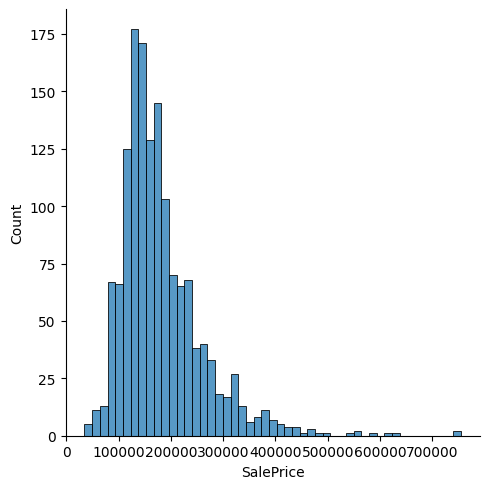

In [ ]:
plt.figure(figsize=(7,7))
sns.displot(housing['SalePrice'])
plt.show()

It is right skewed graph

In [ ]:
print("Skewness :",housing['SalePrice'].skew())
print("Kurtosis :",housing['SalePrice'].kurt())

Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


Optimizing Skewness and kurtosis

In [ ]:
housing['SalePrice']=np.log(housing['SalePrice'])

<Figure size 700x700 with 0 Axes>

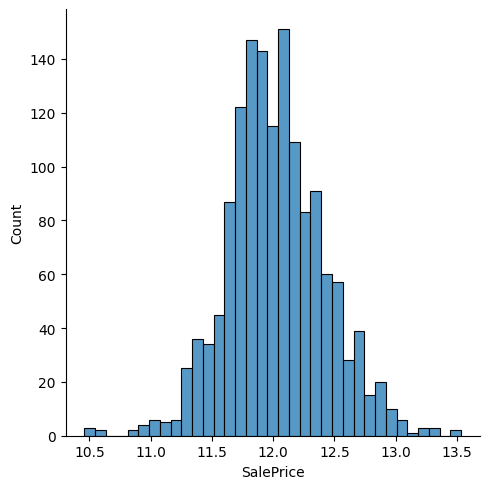

In [ ]:
plt.figure(figsize=(7,7))
sns.displot(housing['SalePrice'])
plt.show()

In [ ]:
print("Skewness :",housing['SalePrice'].skew())
print("Kurtosis :",housing['SalePrice'].kurt())

Skewness : 0.12133506220520406
Kurtosis : 0.8095319958036296


Drop Id column
Columns MSSubClass, OverallQual, OverallCond need to be converted to object type
Column LotFrontage and MasVnrArea needs to be converted to numeric type.

In [ ]:
housing.drop("Id",axis=1,inplace=True)
housing['LotFrontage'] = pd.to_numeric(housing['LotFrontage'], errors='coerce')
housing['MasVnrArea'] = pd.to_numeric(housing['MasVnrArea'], errors='coerce')
housing[['MSSubClass', 'OverallQual', 'OverallCond']] = housing[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [ ]:
null_col=housing.columns[housing.isnull().any()]
null_col

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [ ]:
for i in null_col:
  if housing[i].dtype==np.float64 or housing[i].dtype==np.int64 :
    housing[i].fillna(housing[i].mean(), inplace=True)
  if housing[i].dtype=='o':
    housing[i].fillna(housing[i].mode()[0], inplace=True)

In [ ]:
housing.head(10)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL    65.000000     8450   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL    80.000000     9600   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL    68.000000    11250   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL    60.000000     9550   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL    84.000000    14260   Pave  None      IR1         Lvl    AllPub       FR2   
5         50       RL    85.000000    14115   Pave  None      IR1         Lvl    AllPub    Inside   
6         20       RL    75.000000    10084   Pave  None      Reg         Lvl    AllPub    Inside   
7         60       RL    70.049958    10382   Pave  None      IR1         Lvl    AllPub    Corner   
8         50       RM    51.000000     6120   Pave  None      Reg         Lvl    AllPub    Inside   
9        190       RL    50.000000     7420   Pave  None      Reg         Lvl    AllPub    Corner   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story           6           8   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story           7           5   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story           8           5   
5       Gtl      Mitchel       Norm       Norm     1Fam     1.5Fin           5           5   
6       Gtl      Somerst       Norm       Norm     1Fam     1Story           8           5   
7       Gtl       NWAmes       PosN       Norm     1Fam     2Story           7           6   
8       Gtl      OldTown     Artery       Norm     1Fam     1.5Fin           7           5   
9       Gtl      BrkSide     Artery     Artery   2fmCon     1.5Unf           5           6   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   
5       1993          1995     Gable  CompShg     VinylSd     VinylSd       None         0.0   
6       2004          2005     Gable  CompShg     VinylSd     VinylSd      Stone       186.0   
7       1973          1973     Gable  CompShg     HdBoard     HdBoard      Stone       240.0   
8       1931          1950     Gable  CompShg     BrkFace     Wd Shng       None         0.0   
9       1939          1950     Gable  CompShg     MetalSd     MetalSd       None         0.0   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ         706   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ         978   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ         486   
3        TA        TA     BrkTil       TA       Gd           No          ALQ         216   
4        Gd        TA      PConc       Gd       TA           Av          GLQ         655   
5        TA        TA       Wood       Gd       TA           No          GLQ         732   
6        Gd        TA      PConc       Ex       TA           Av          GLQ        1369   
7        TA        TA     CBlock       Gd       TA           M

### Data Analysis

In [ ]:
housing_num = housing.select_dtypes(include=['int64', 'float64'])
housing_cat = housing.select_dtypes(include='object')

# Univarient Analysis

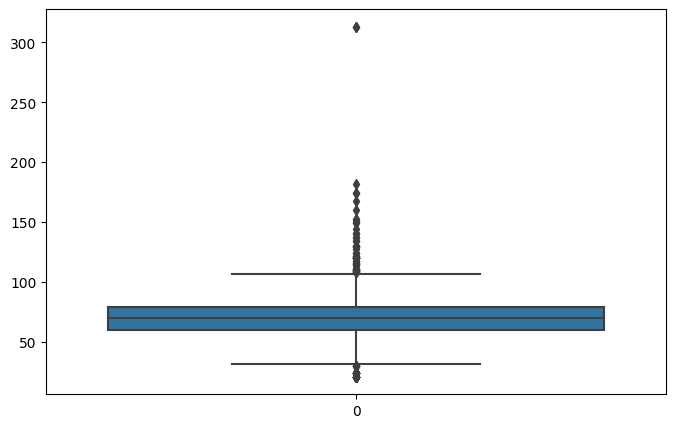

LotFrontage


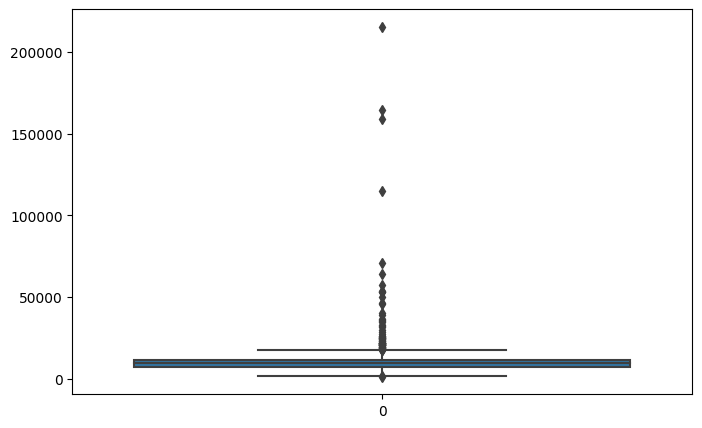

LotArea


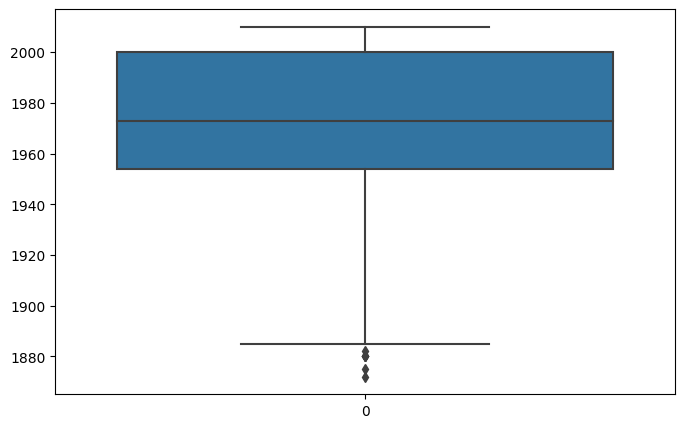

YearBuilt


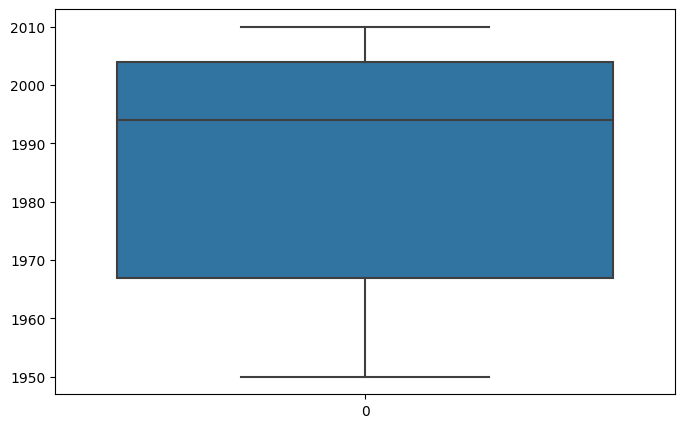

YearRemodAdd


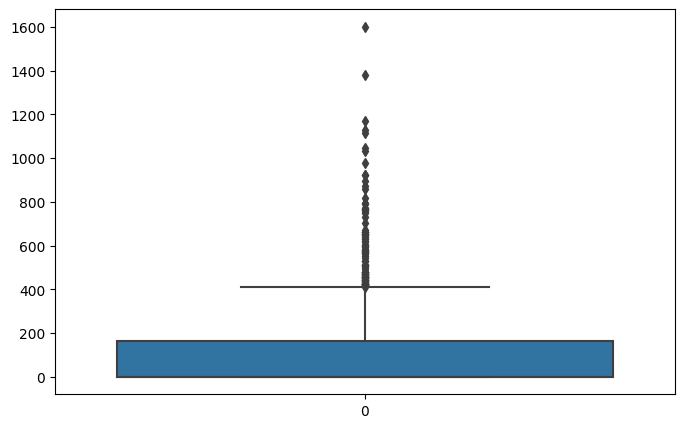

MasVnrArea


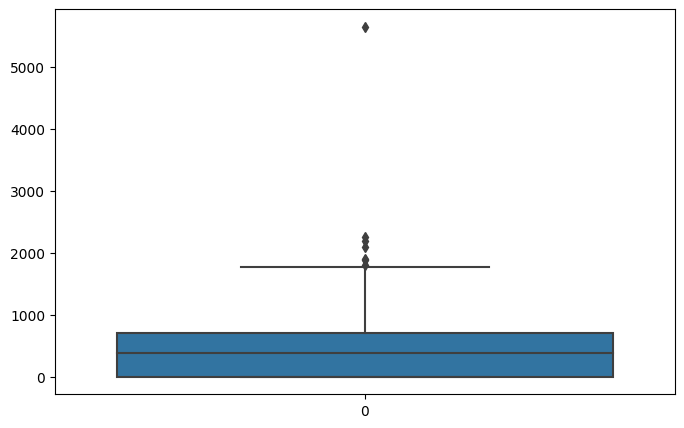

BsmtFinSF1


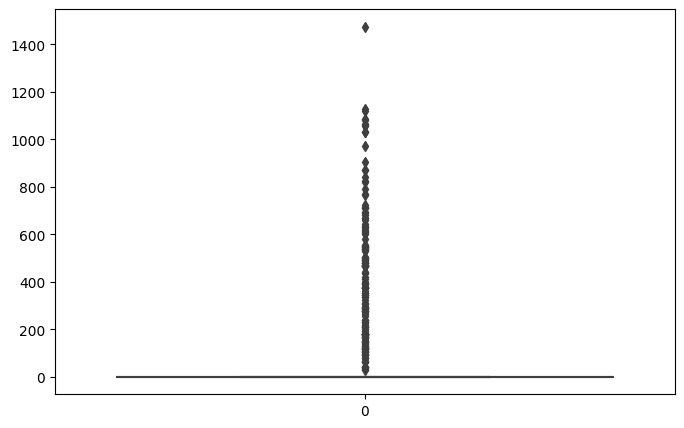

BsmtFinSF2


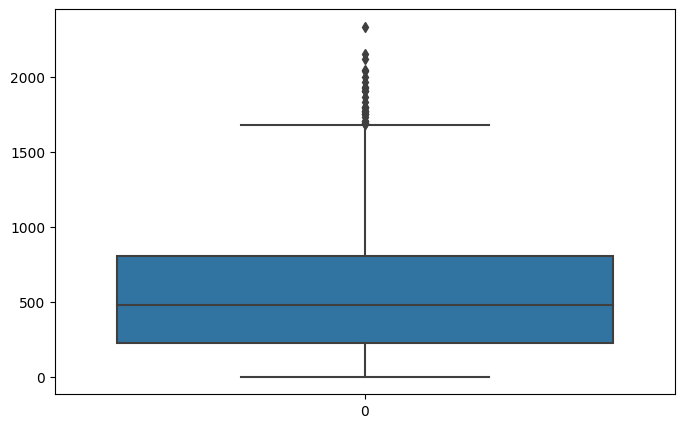

BsmtUnfSF


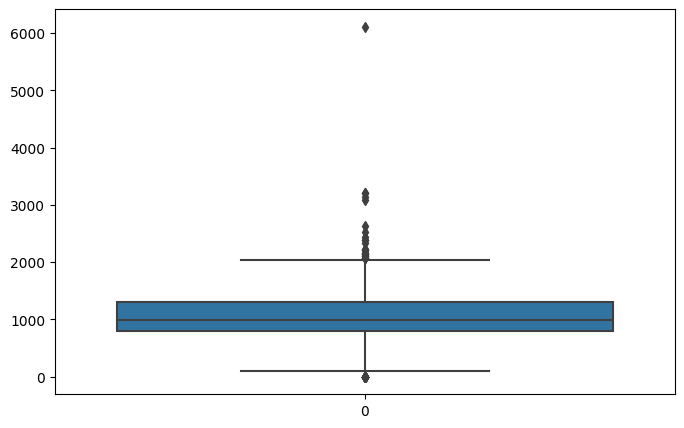

TotalBsmtSF


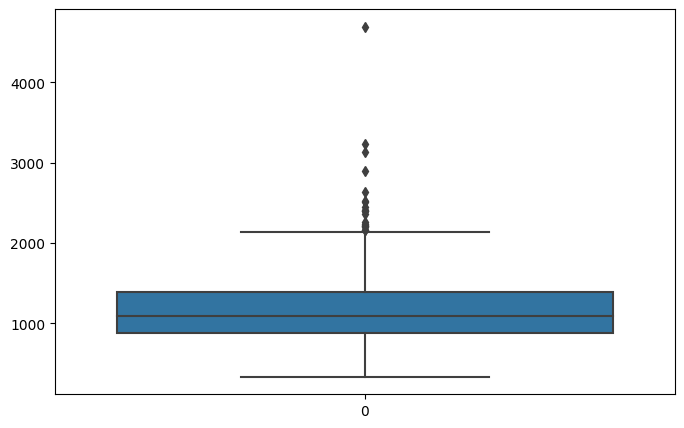

1stFlrSF


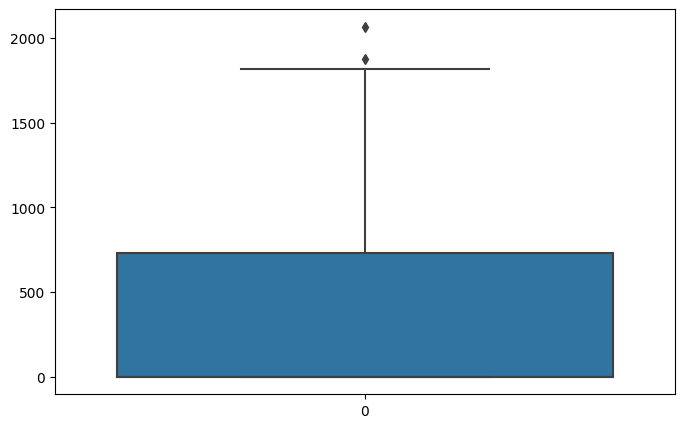

2ndFlrSF


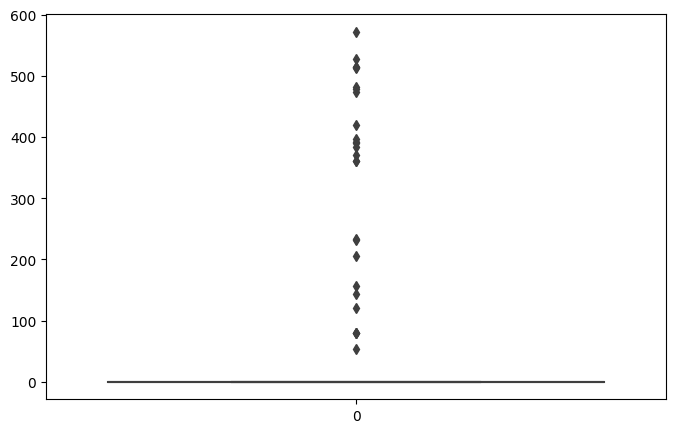

LowQualFinSF


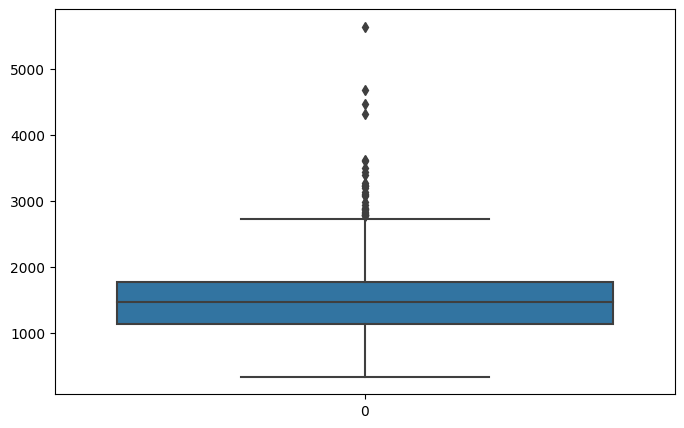

GrLivArea


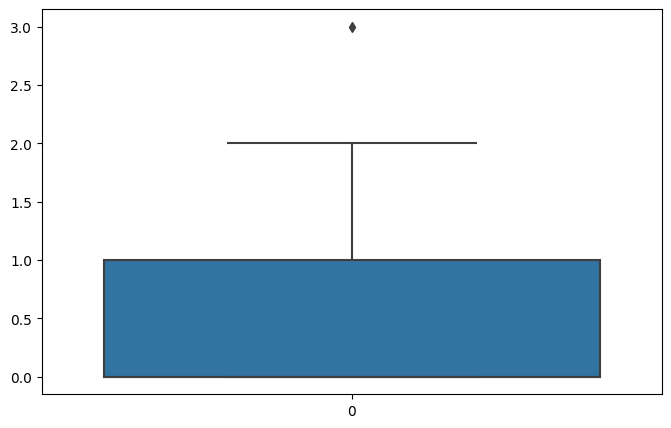

BsmtFullBath


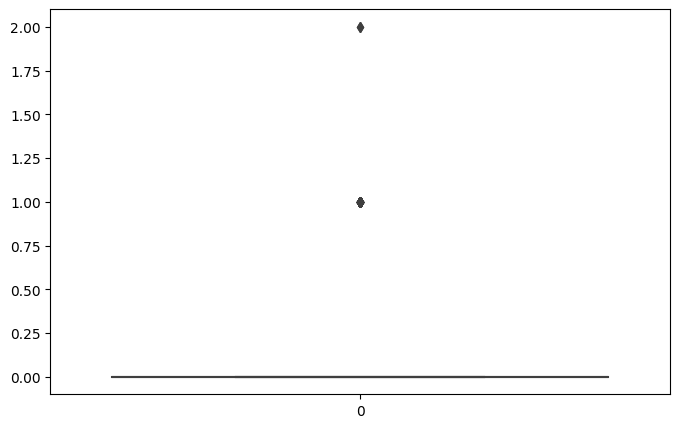

BsmtHalfBath


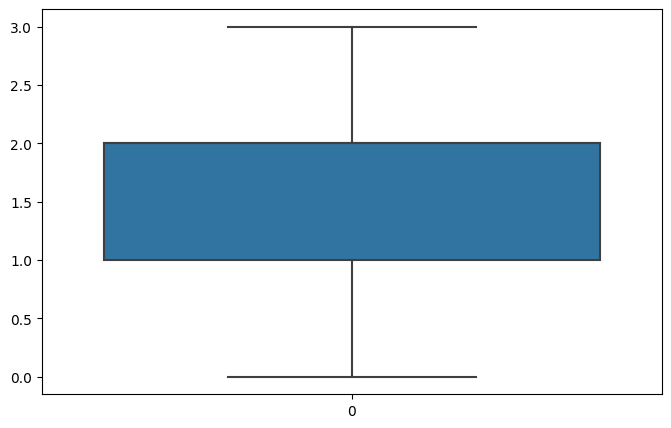

FullBath


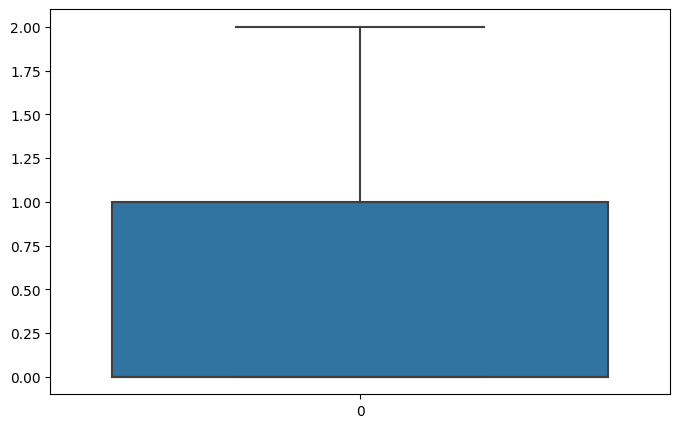

HalfBath


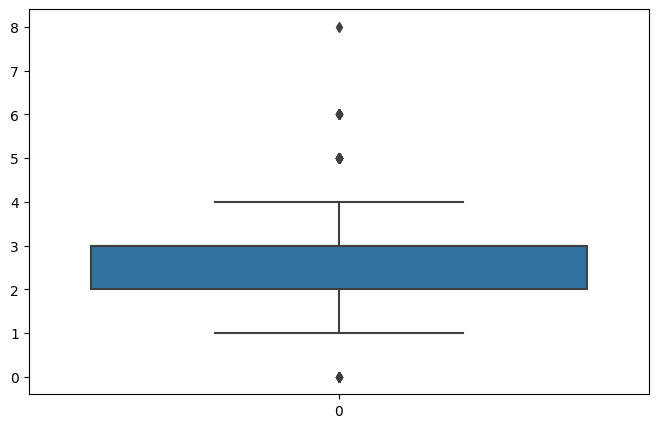

BedroomAbvGr


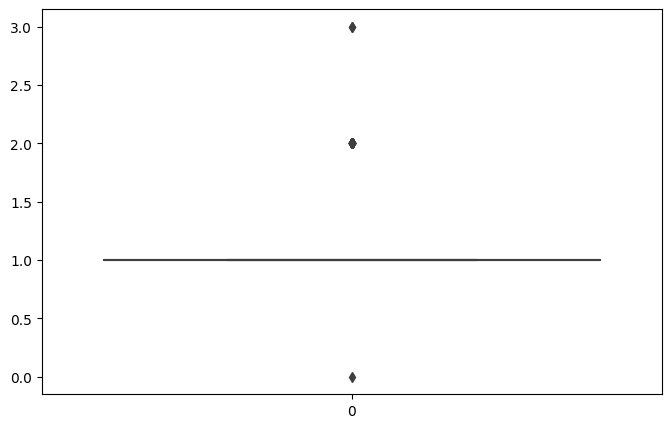

KitchenAbvGr


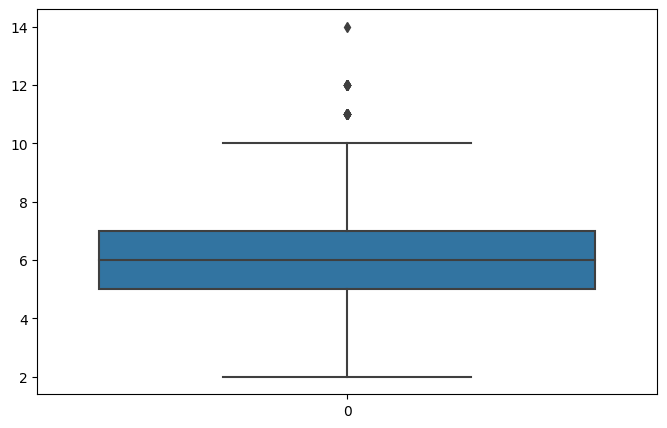

TotRmsAbvGrd


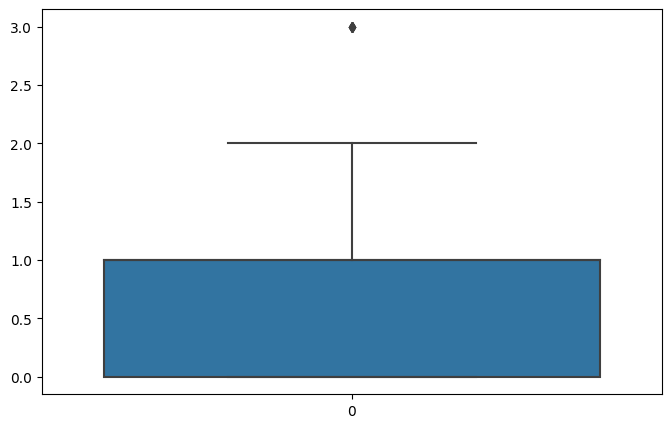

Fireplaces


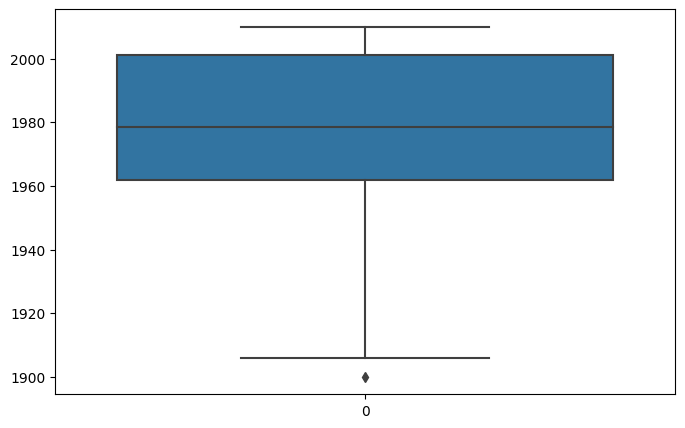

GarageYrBlt


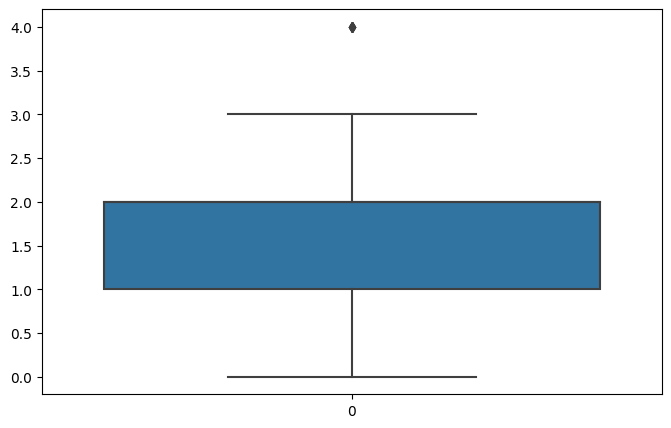

GarageCars


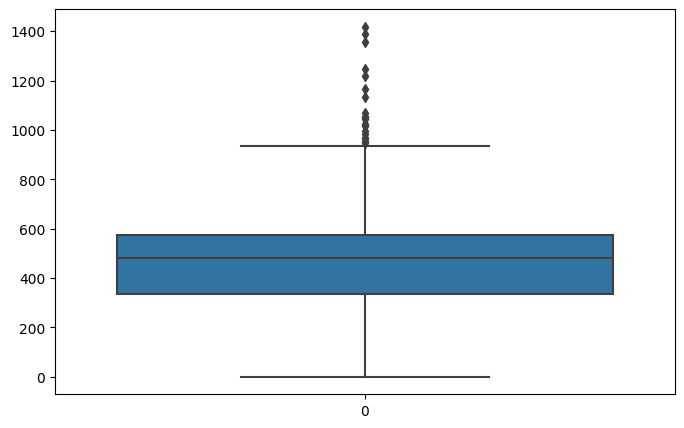

GarageArea


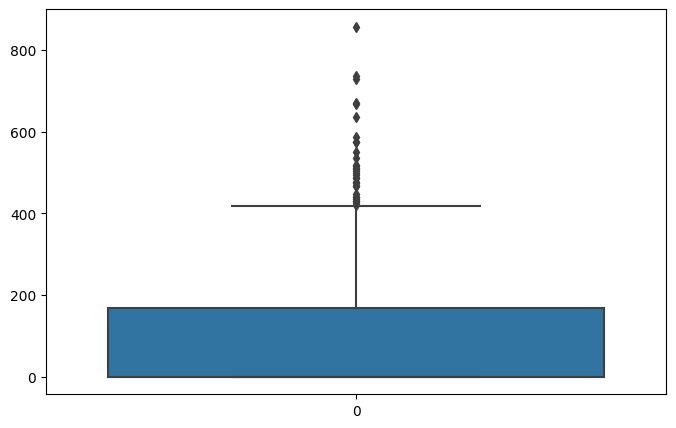

WoodDeckSF


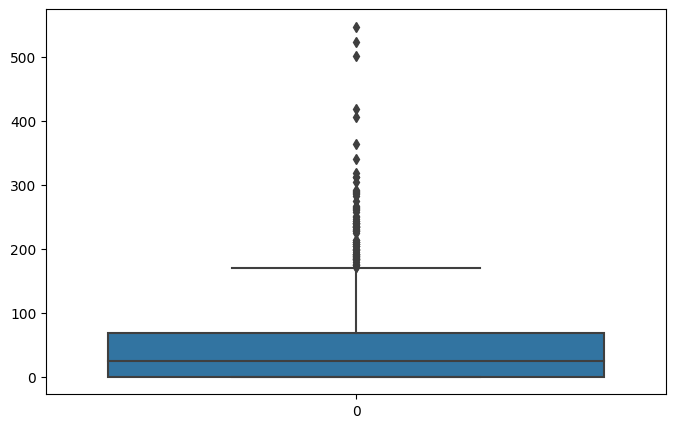

OpenPorchSF


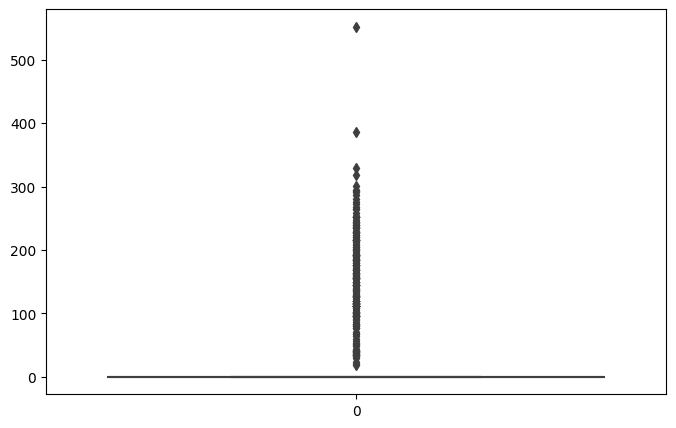

EnclosedPorch


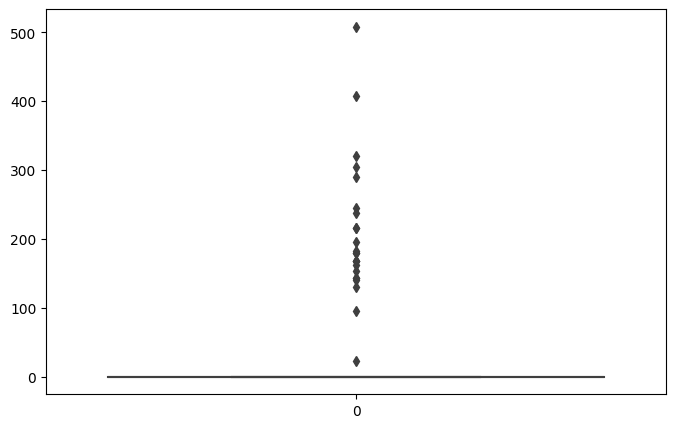

3SsnPorch


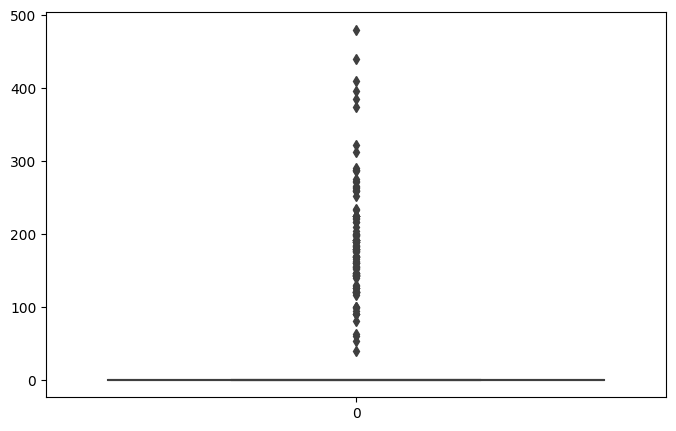

ScreenPorch


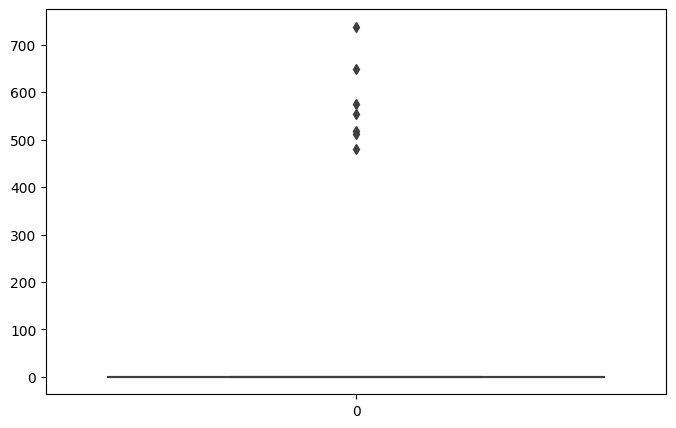

PoolArea


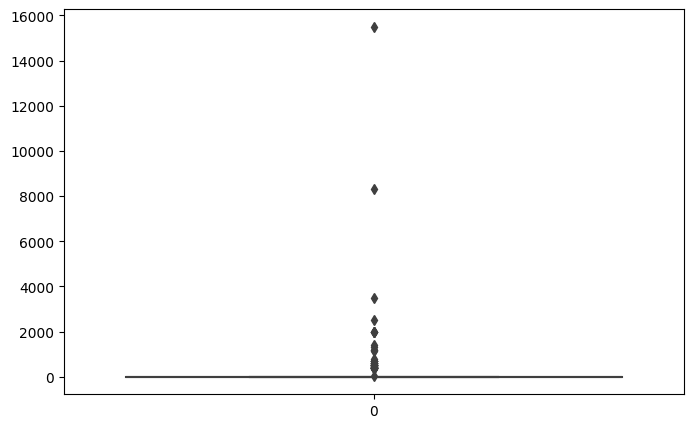

MiscVal


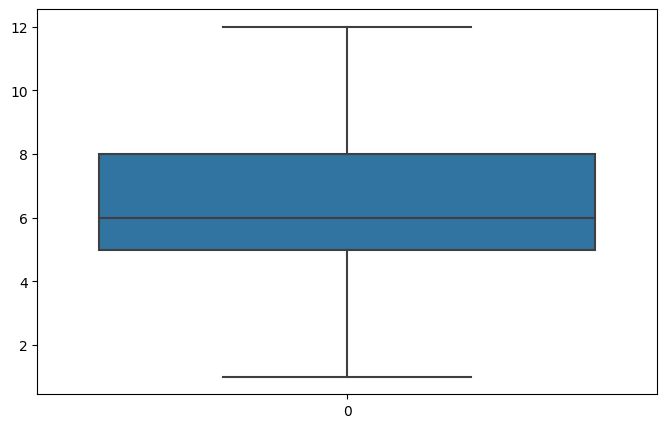

MoSold


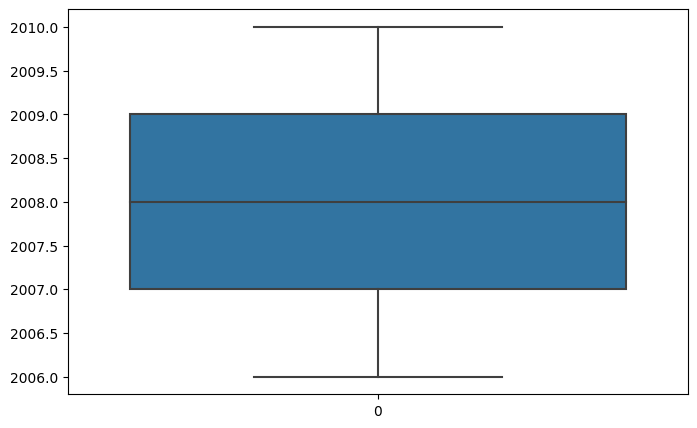

YrSold


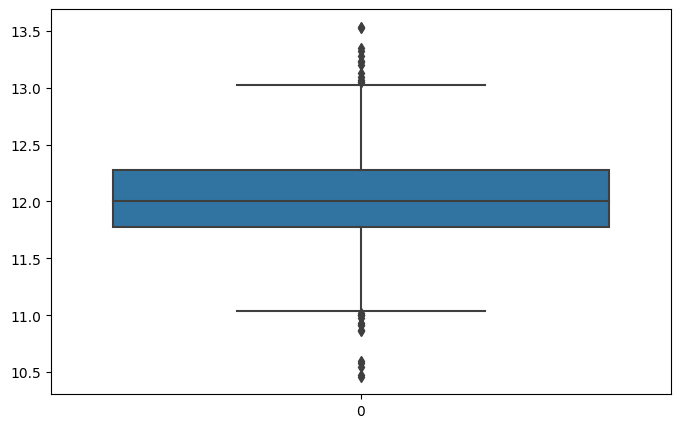

SalePrice


In [ ]:
#Numerical data analysis
for i in housing_num:
  plt.figure(figsize=(8,5))
  sns.boxplot(housing[i])
  plt.show()
  print(i)


We can see outlayers in LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,etc...

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64


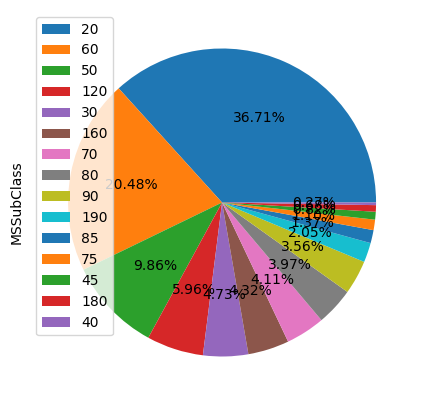

-------------------------- MSSubClass -----------------------
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64


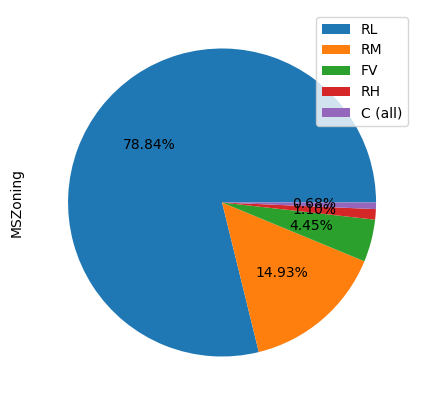

-------------------------- MSZoning -----------------------
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64


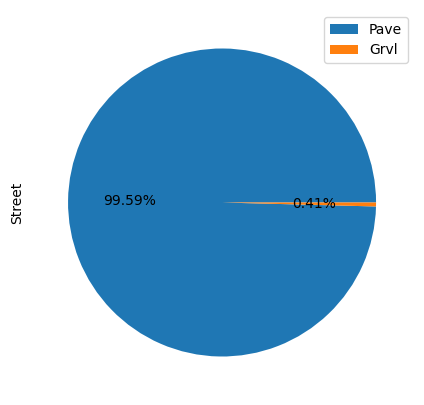

-------------------------- Street -----------------------
None    0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64


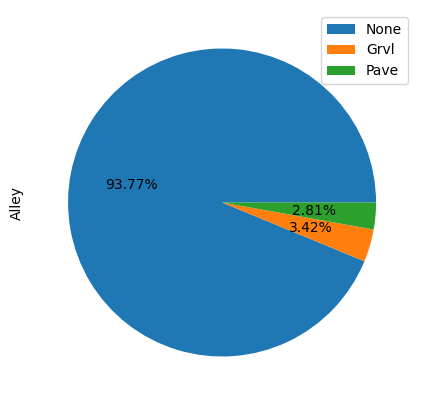

-------------------------- Alley -----------------------
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64


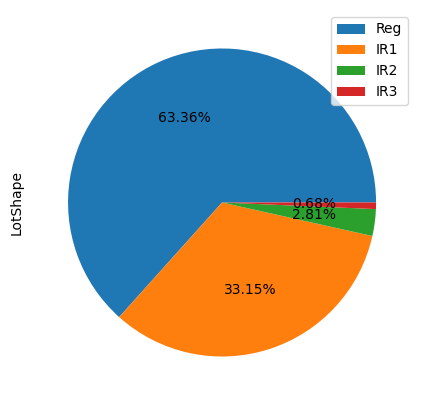

-------------------------- LotShape -----------------------
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64


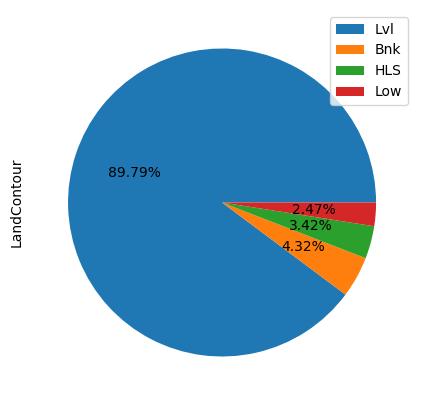

-------------------------- LandContour -----------------------
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64


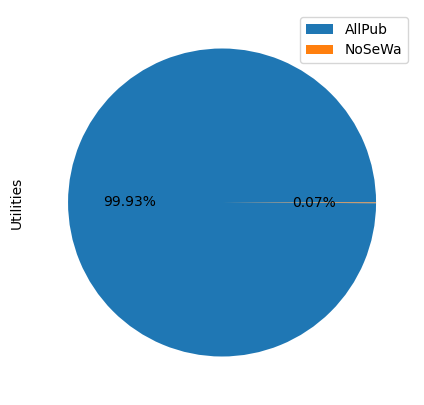

-------------------------- Utilities -----------------------
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64


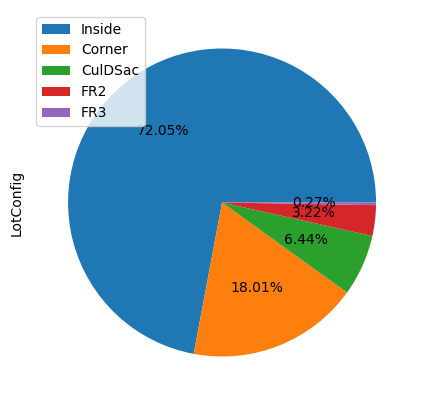

-------------------------- LotConfig -----------------------
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64


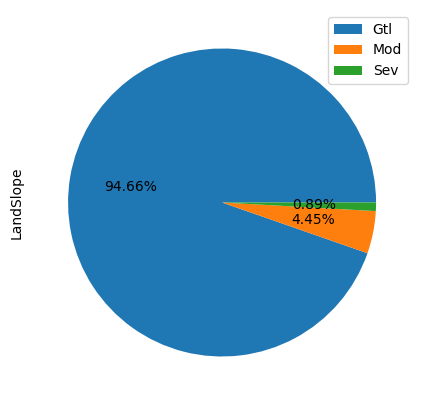

-------------------------- LandSlope -----------------------
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64


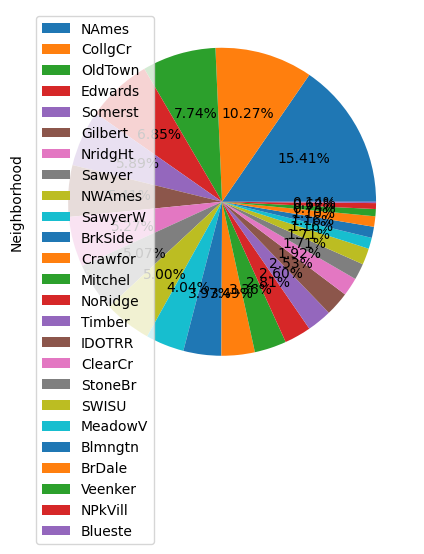

-------------------------- Neighborhood -----------------------
Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64


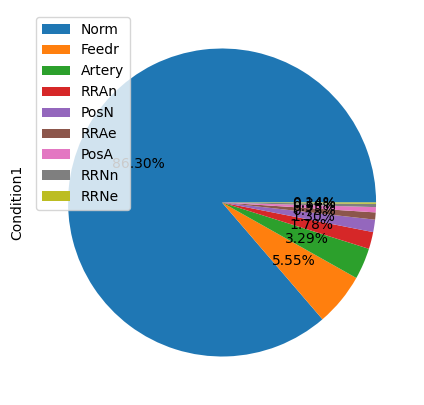

-------------------------- Condition1 -----------------------
Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: Condition2, dtype: float64


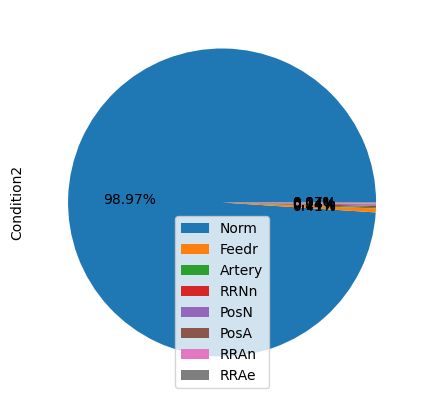

-------------------------- Condition2 -----------------------
1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64


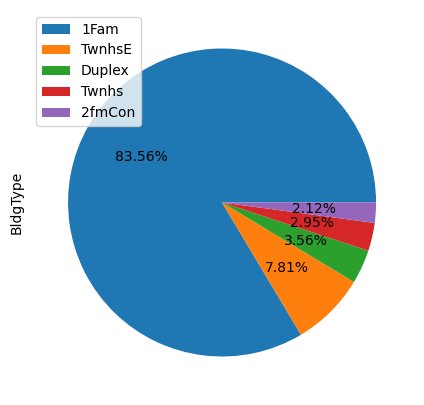

-------------------------- BldgType -----------------------
1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64


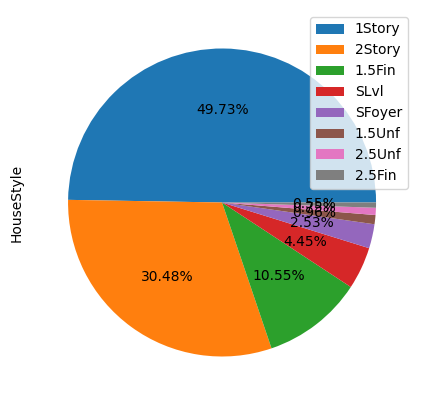

-------------------------- HouseStyle -----------------------
5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64


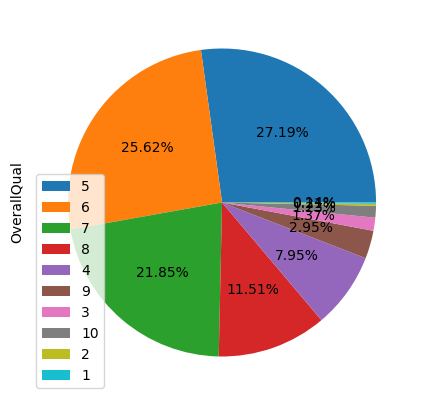

-------------------------- OverallQual -----------------------
5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64


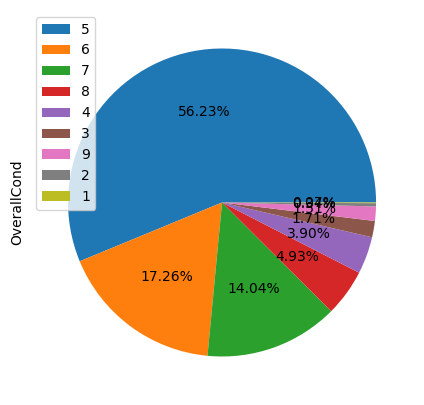

-------------------------- OverallCond -----------------------
Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64


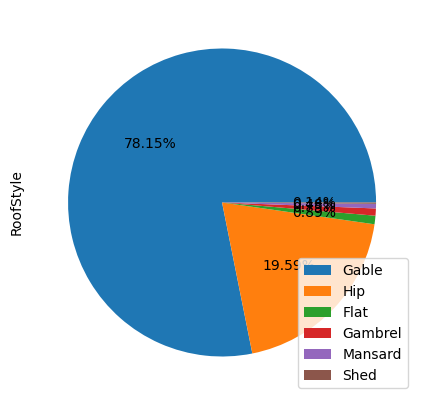

-------------------------- RoofStyle -----------------------
CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.000685
Membran    0.000685
Roll       0.000685
ClyTile    0.000685
Name: RoofMatl, dtype: float64


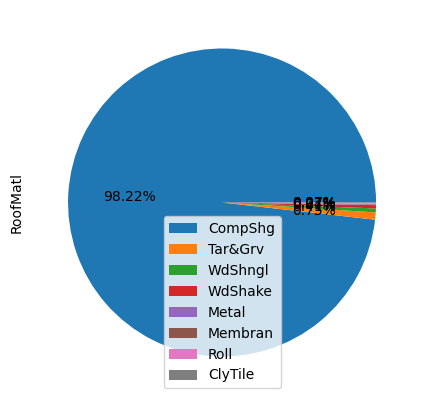

-------------------------- RoofMatl -----------------------
VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: Exterior1st, dtype: float64


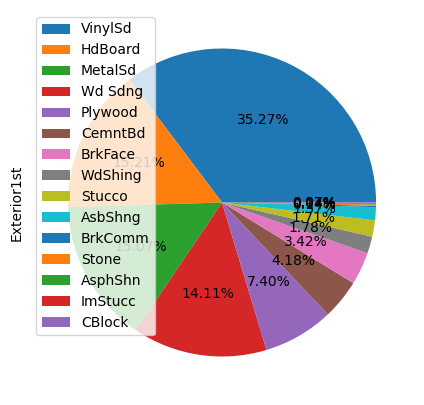

-------------------------- Exterior1st -----------------------
VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: Exterior2nd, dtype: float64


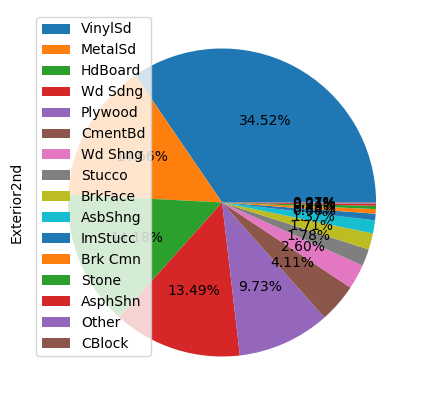

-------------------------- Exterior2nd -----------------------
None       0.597260
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64


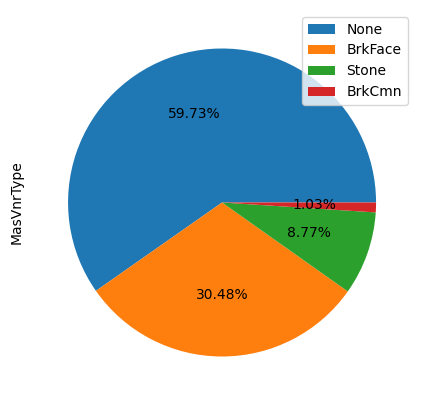

-------------------------- MasVnrType -----------------------
TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64


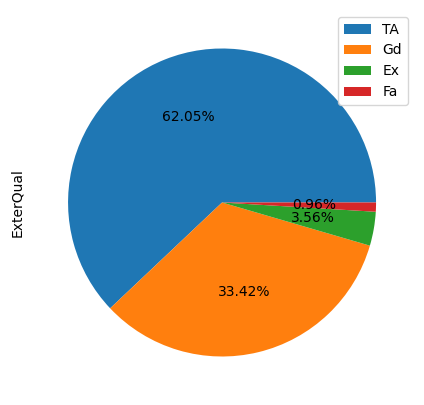

-------------------------- ExterQual -----------------------
TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: ExterCond, dtype: float64


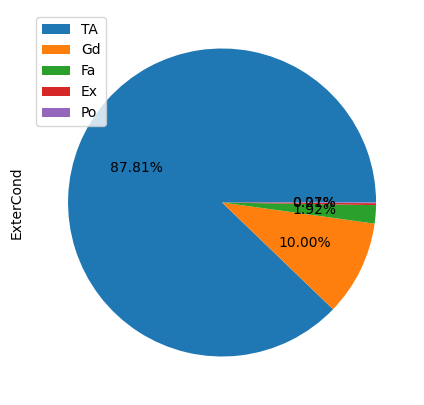

-------------------------- ExterCond -----------------------
PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64


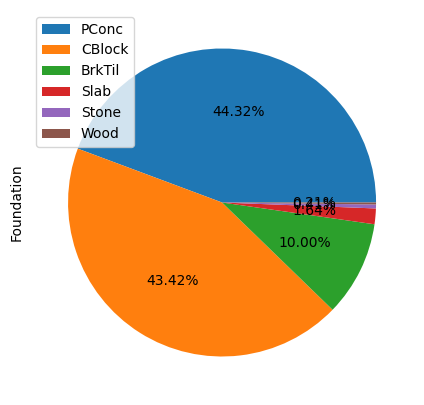

-------------------------- Foundation -----------------------
TA      0.444521
Gd      0.423288
Ex      0.082877
None    0.025342
Fa      0.023973
Name: BsmtQual, dtype: float64


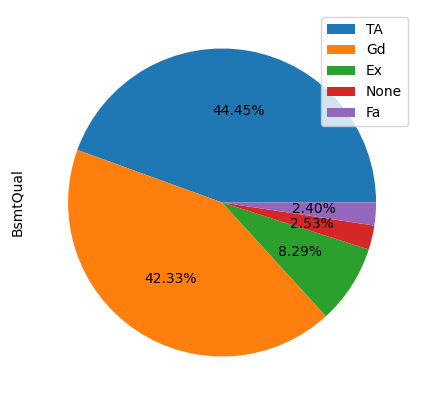

-------------------------- BsmtQual -----------------------
TA      0.897945
Gd      0.044521
Fa      0.030822
None    0.025342
Po      0.001370
Name: BsmtCond, dtype: float64


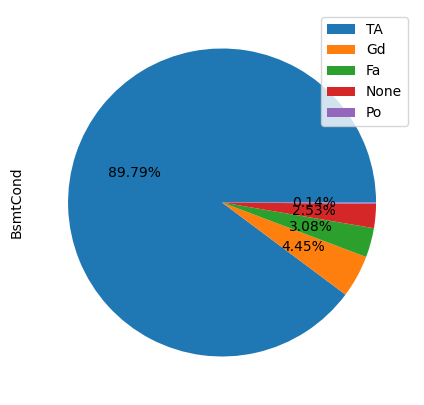

-------------------------- BsmtCond -----------------------
No      0.652740
Av      0.151370
Gd      0.091781
Mn      0.078082
None    0.026027
Name: BsmtExposure, dtype: float64


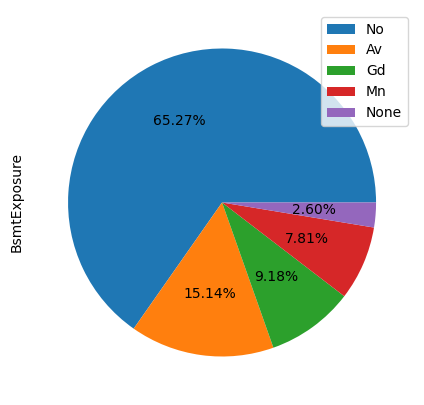

-------------------------- BsmtExposure -----------------------
Unf     0.294521
GLQ     0.286301
ALQ     0.150685
BLQ     0.101370
Rec     0.091096
LwQ     0.050685
None    0.025342
Name: BsmtFinType1, dtype: float64


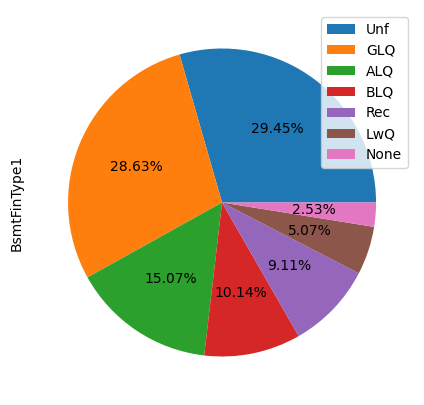

-------------------------- BsmtFinType1 -----------------------
Unf     0.860274
Rec     0.036986
LwQ     0.031507
None    0.026027
BLQ     0.022603
ALQ     0.013014
GLQ     0.009589
Name: BsmtFinType2, dtype: float64


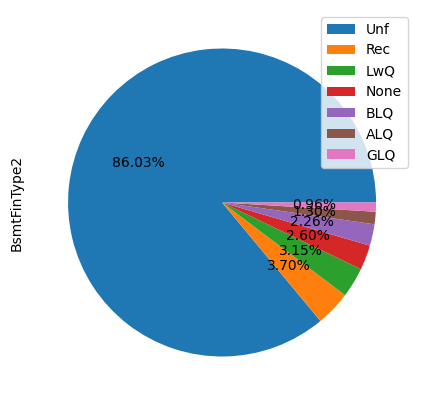

-------------------------- BsmtFinType2 -----------------------
GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: Heating, dtype: float64


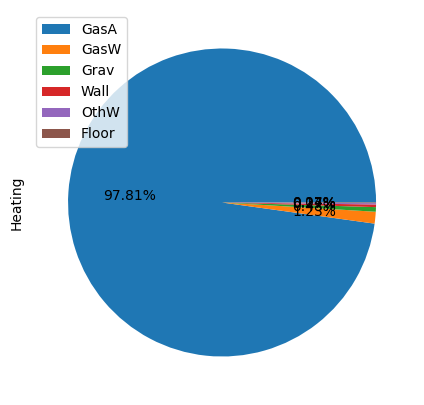

-------------------------- Heating -----------------------
Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: HeatingQC, dtype: float64


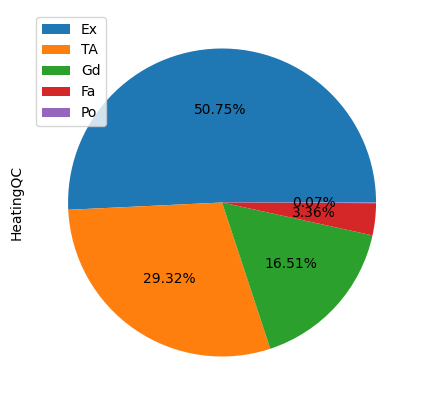

-------------------------- HeatingQC -----------------------
Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64


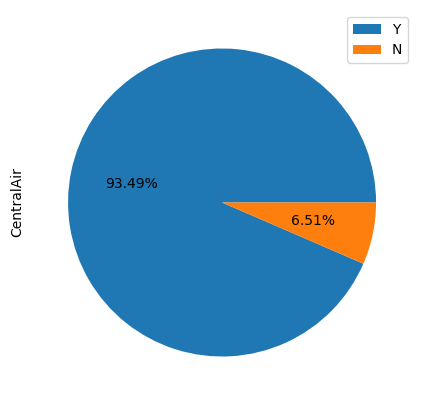

-------------------------- CentralAir -----------------------
SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
None     0.000685
Name: Electrical, dtype: float64


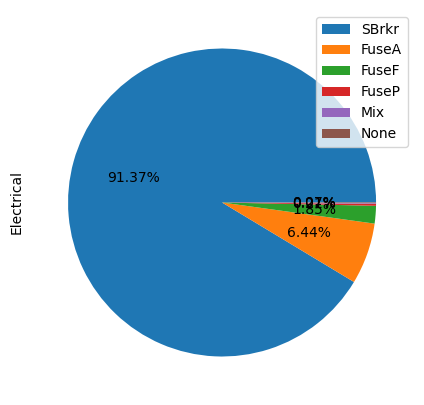

-------------------------- Electrical -----------------------
TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64


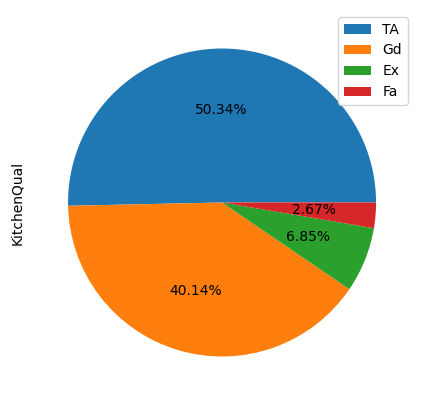

-------------------------- KitchenQual -----------------------
Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functional, dtype: float64


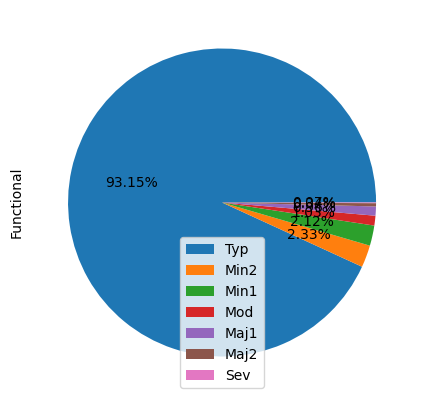

-------------------------- Functional -----------------------
None    0.472603
Gd      0.260274
TA      0.214384
Fa      0.022603
Ex      0.016438
Po      0.013699
Name: FireplaceQu, dtype: float64


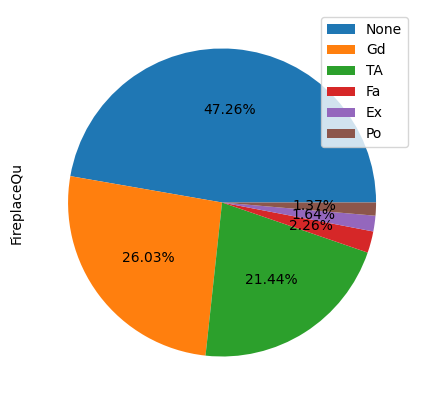

-------------------------- FireplaceQu -----------------------
Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
None       0.055479
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64


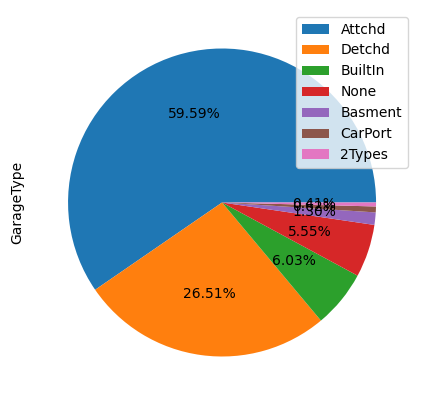

-------------------------- GarageType -----------------------
Unf     0.414384
RFn     0.289041
Fin     0.241096
None    0.055479
Name: GarageFinish, dtype: float64


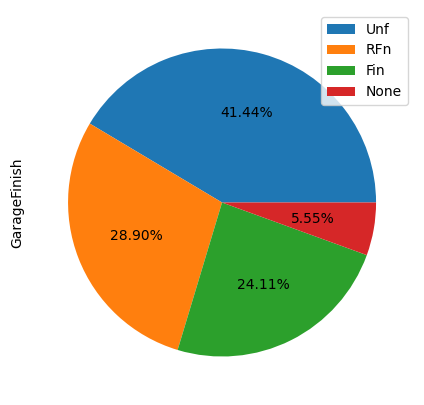

-------------------------- GarageFinish -----------------------
TA      0.897945
None    0.055479
Fa      0.032877
Gd      0.009589
Ex      0.002055
Po      0.002055
Name: GarageQual, dtype: float64


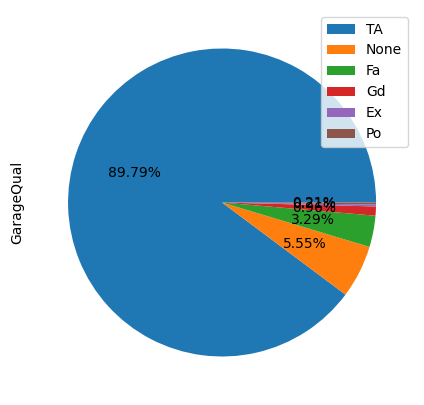

-------------------------- GarageQual -----------------------
TA      0.908219
None    0.055479
Fa      0.023973
Gd      0.006164
Po      0.004795
Ex      0.001370
Name: GarageCond, dtype: float64


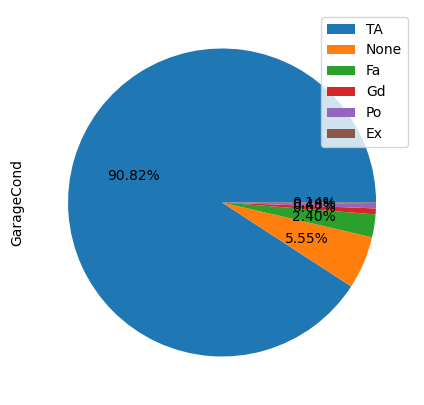

-------------------------- GarageCond -----------------------
Y    0.917808
N    0.061644
P    0.020548
Name: PavedDrive, dtype: float64


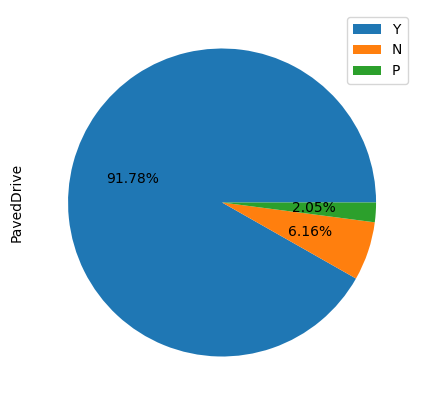

-------------------------- PavedDrive -----------------------
None    0.995205
Gd      0.002055
Ex      0.001370
Fa      0.001370
Name: PoolQC, dtype: float64


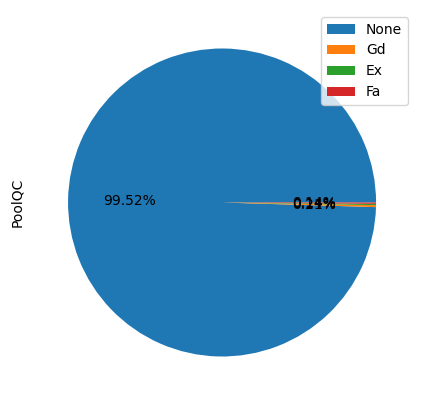

-------------------------- PoolQC -----------------------
None     0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: Fence, dtype: float64


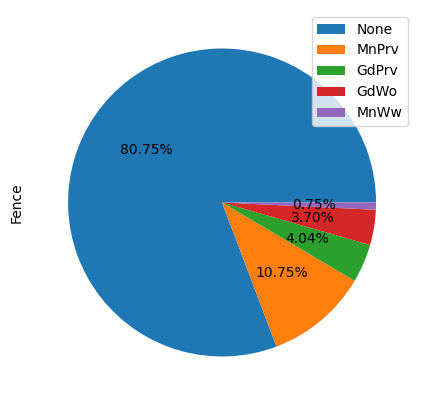

-------------------------- Fence -----------------------
None    0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: MiscFeature, dtype: float64


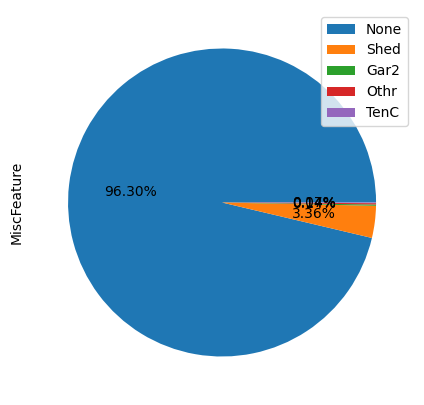

-------------------------- MiscFeature -----------------------
WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLI    0.003425
ConLw    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: SaleType, dtype: float64


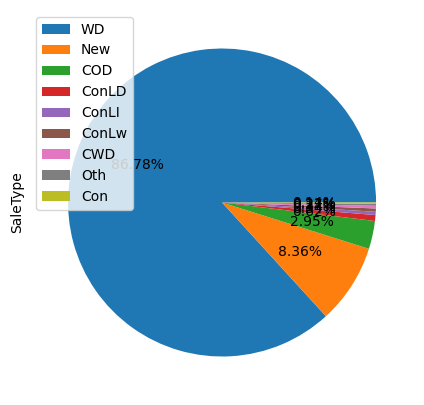

-------------------------- SaleType -----------------------
Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64


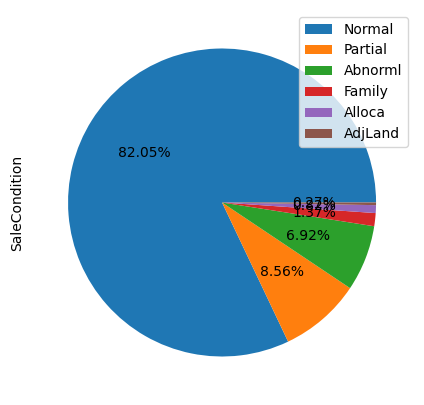

-------------------------- SaleCondition -----------------------


In [ ]:
#Categorical data analysis
for i in housing_cat:
  print(housing[i].value_counts(normalize=True))
  plt.figure(figsize=(8,5))
  housing[i].value_counts(normalize=True).plot.pie(labeldistance=None,autopct='%1.2f%%')
  plt.legend()
  plt.show()
  print("--------------------------",i,"-----------------------")

# We can look into Dominating characteristics percentage values of Category of columns and infer that MSZoning,Street,Alley,LandContour,Utilities,LandSlope,Condition1,Condition2,BldgType,RoofMatl,etc...

# Bivariate/Multivariate

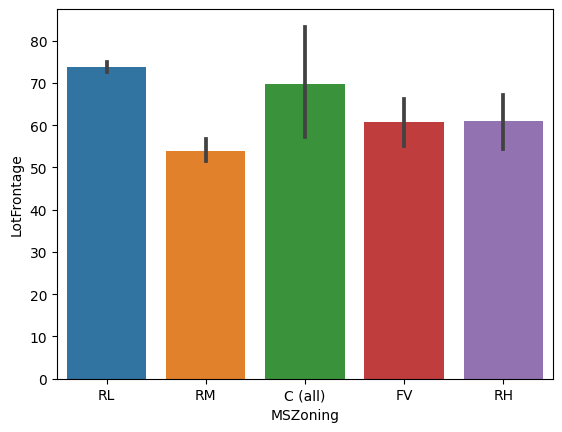

In [ ]:
#plot of MSzoning vs LotFrontage
sns.barplot(x="MSZoning",y="LotFrontage",data=housing)
plt.show()

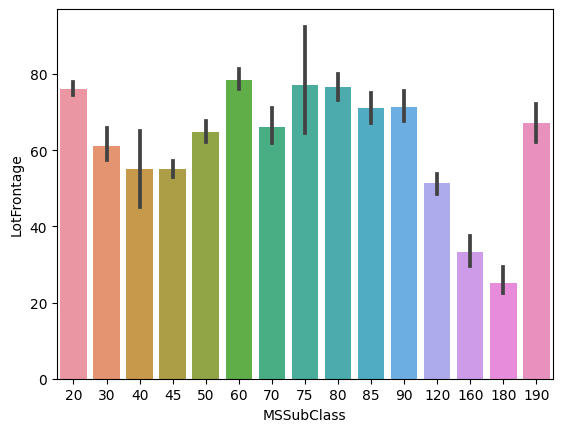

In [ ]:
#plot of MSzoning vs LotFrontage
sns.barplot(x="MSSubClass",y="LotFrontage",data=housing)
plt.show()

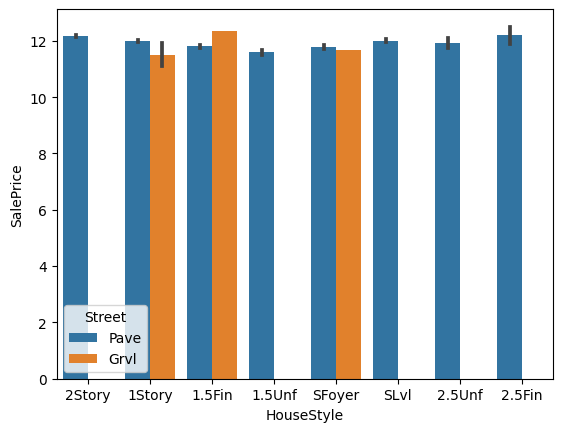

In [ ]:
#plot of Housingstyle vs salesprice based on street
sns.barplot(x="HouseStyle",y="SalePrice",data=housing,hue="Street")
plt.show()

In [ ]:
housing['Age'] = housing['YrSold'] - housing['YearBuilt']
housing.drop(columns=['YearBuilt','YrSold'],axis=1,inplace=True)
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL         65.0     8450   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL         80.0     9600   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL         68.0    11250   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL         60.0     9550   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL         84.0    14260   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story           6           8   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story           7           5   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story           8           5   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0        TA      PConc       Gd       TA           No          GLQ         706          Unf   
1        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf   
2        TA      PConc       Gd       TA           Mn          GLQ         486          Unf   
3        TA     BrkTil       TA       Gd           No          ALQ         216          Unf   
4        TA      PConc       Gd       TA           Av          GLQ         655          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0           0        150          856    GasA        Ex          Y      SBrkr       856       854   
1           0        284         1262    GasA        Ex          Y      SBrkr      1262         0   
2           0        434          920    GasA        Ex          Y      SBrkr       920       866   
3           0        540          756    GasA        Gd          Y      SBrkr       961       756   
4           0        490         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0             0       1710             1             0         2         1             3   
1             0       1262             0             1         2         0             3   
2             0       1786             1             0         2         1             3   
3             0       1717             1             0         1         0             3   
4             0       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd             8        Typ           0        None     Attchd   
1             1          TA             6        Typ           1          TA     Attchd   
2             1          Gd             6        Typ           1          TA     Attchd   
3             1          Gd             7        Typ           1          Gd     Detchd   
4             1          Gd             9        Typ           1         

Correlation between numerical columns

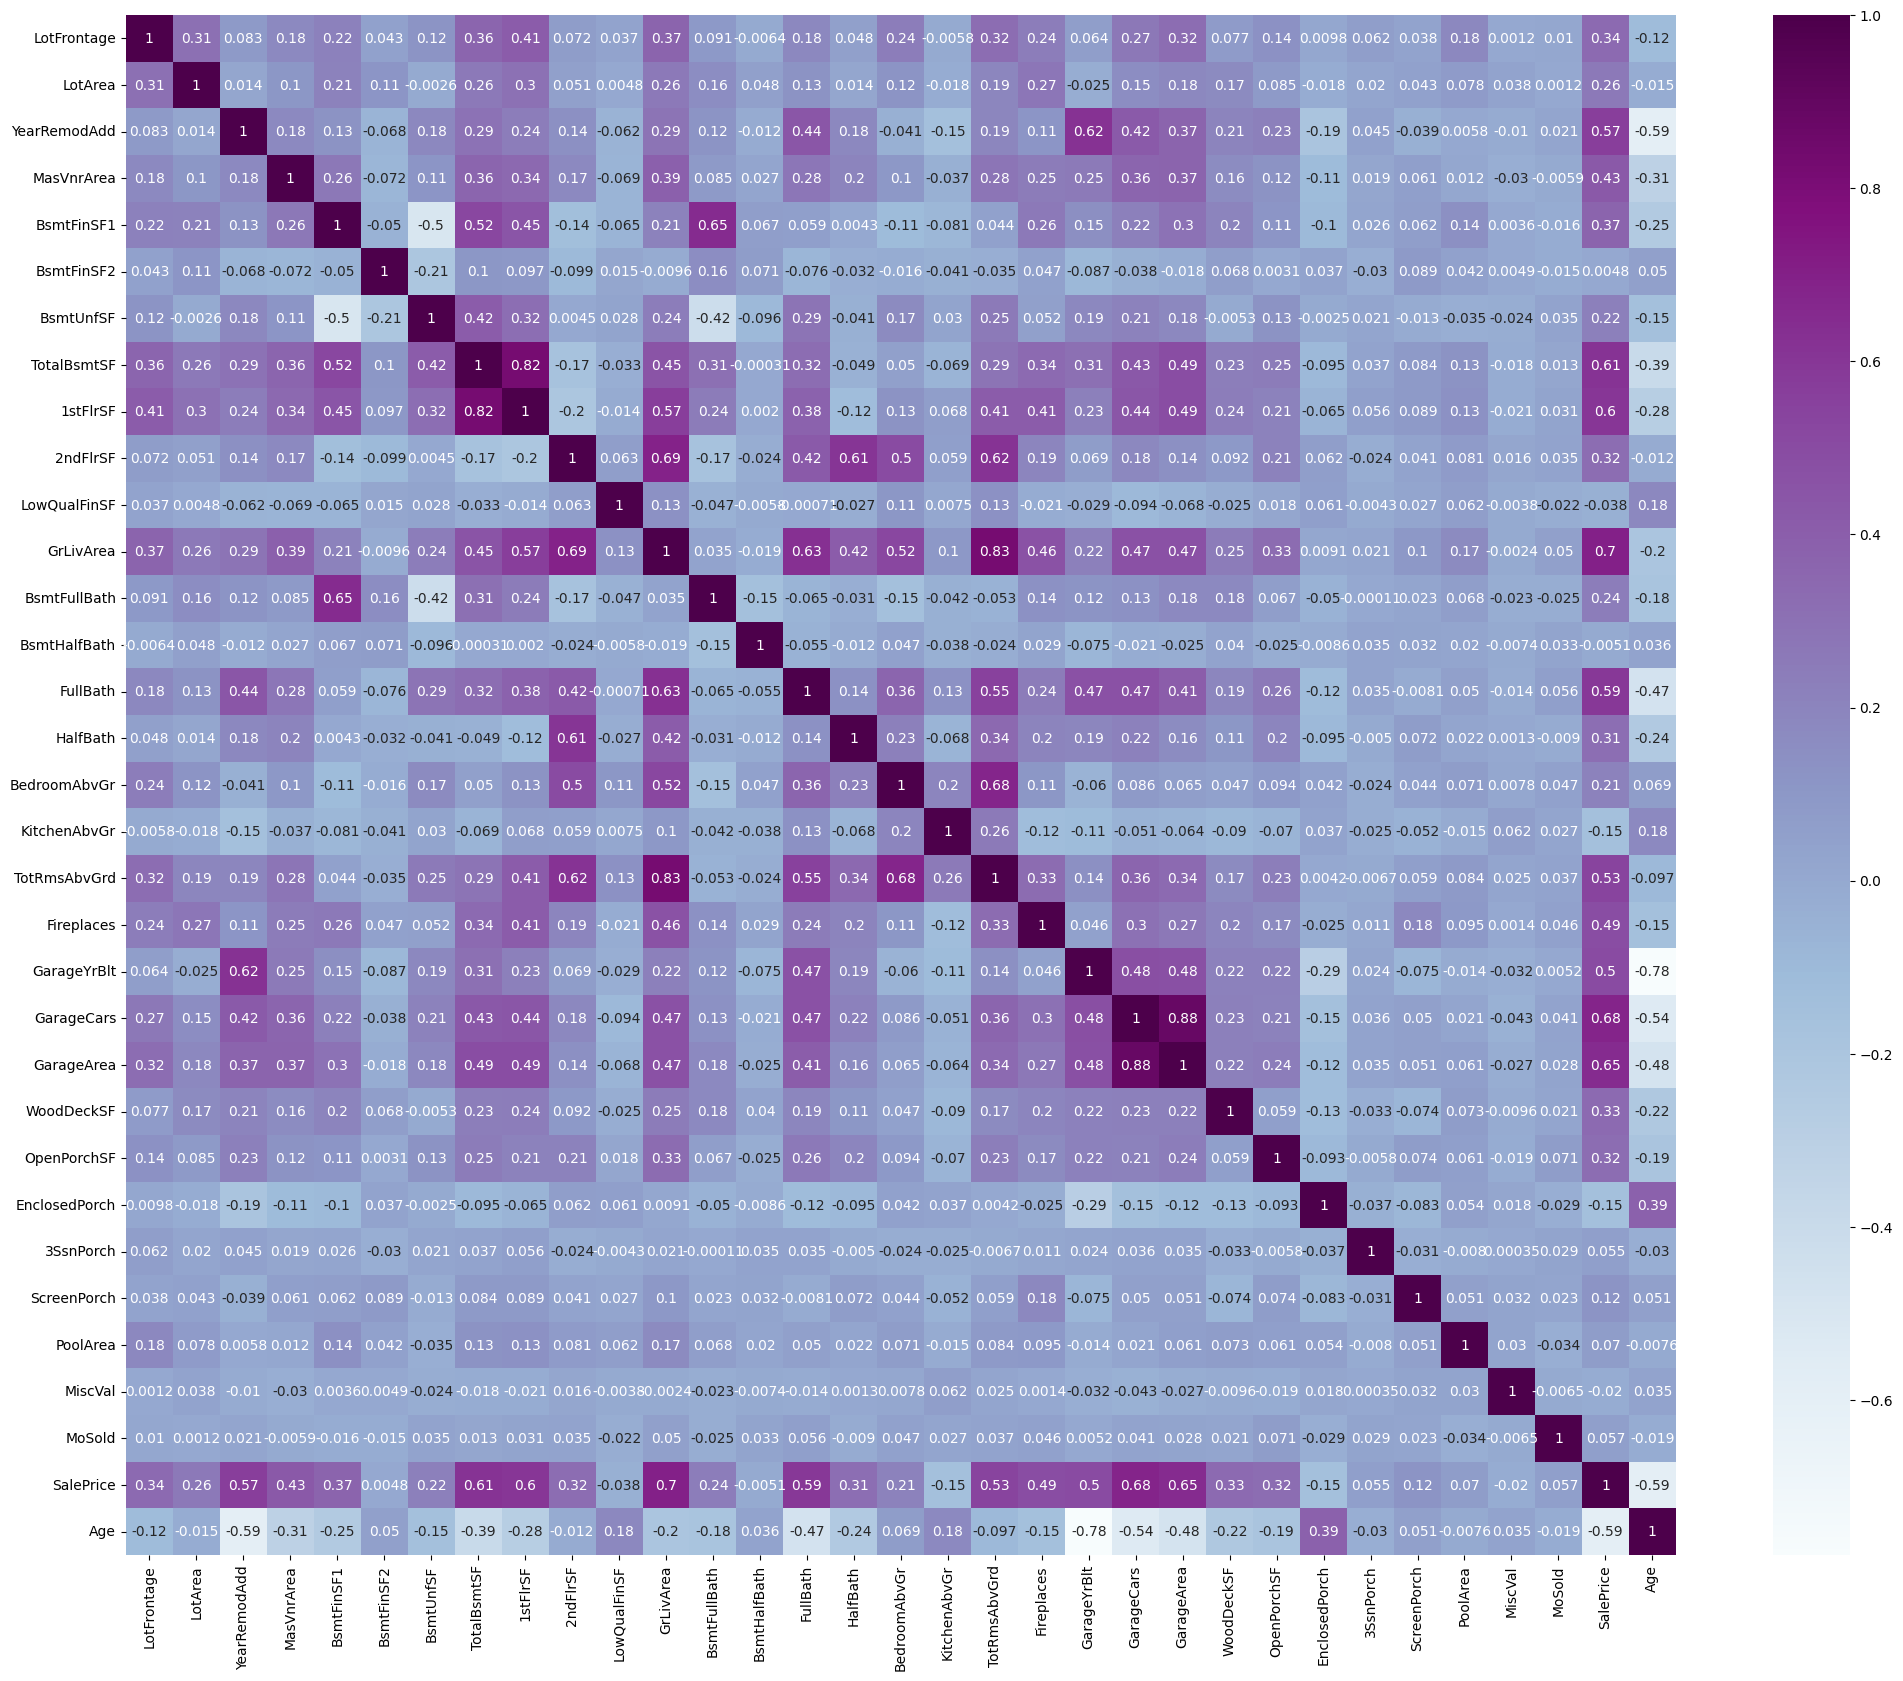

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(housing.corr(numeric_only=True), annot=True, cmap='BuPu')

Top 10 correlated columns

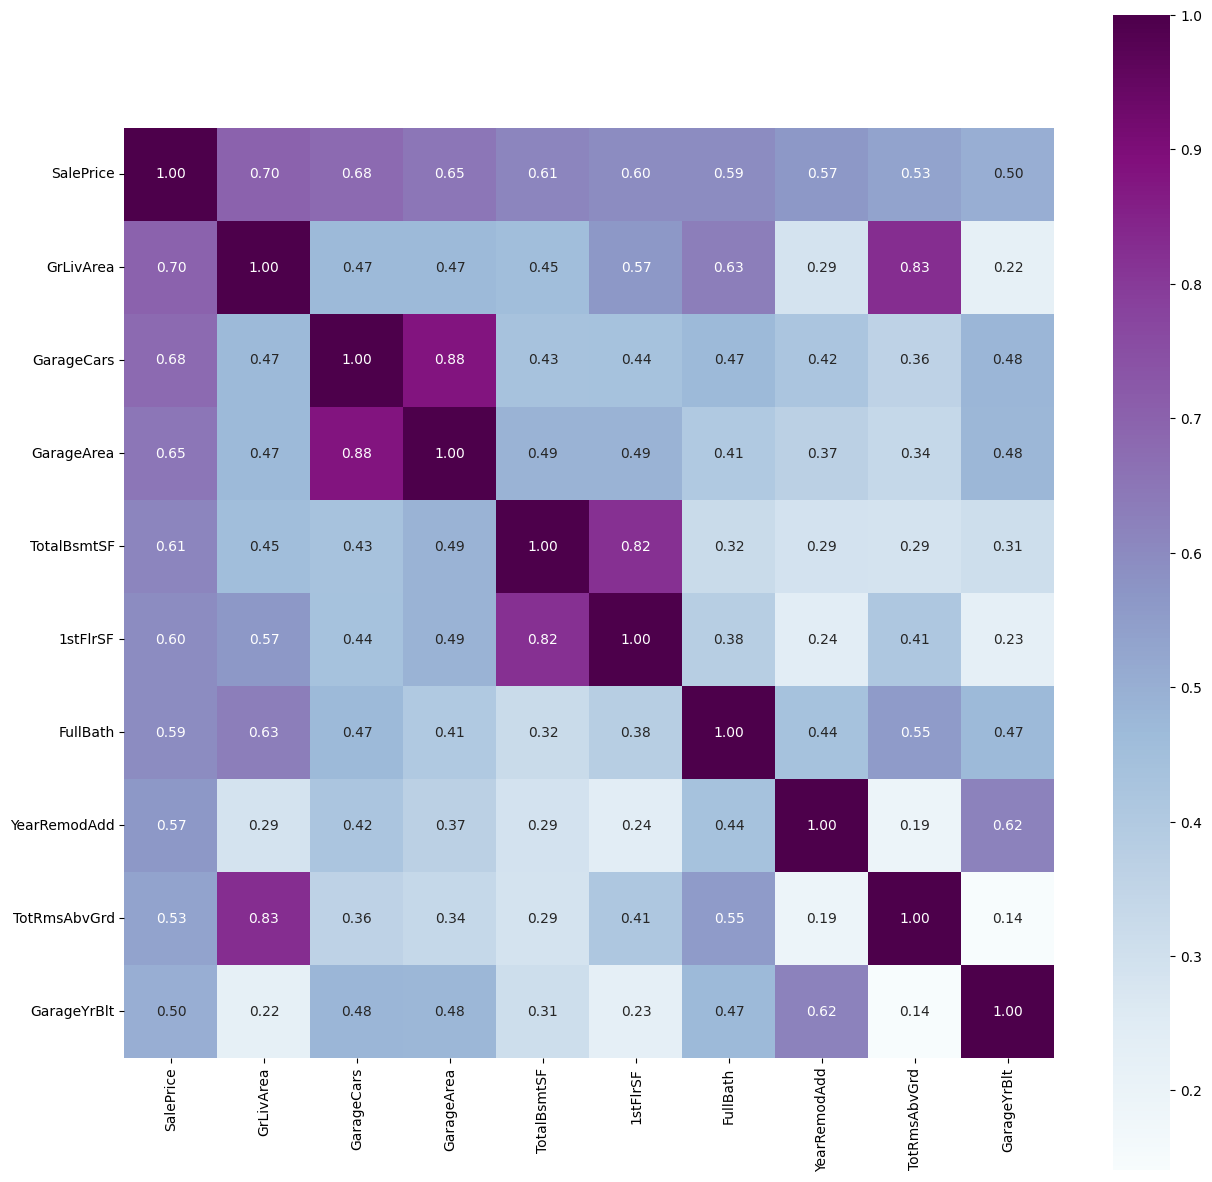

In [ ]:
k=10
plt.figure(figsize=(15,15))
cols=housing.corr(numeric_only=True).nlargest(k,'SalePrice').index
cm=np.corrcoef(housing[cols].values.T)
sns.heatmap(cm, annot=True,square=True,fmt='.2f',cbar=True, cmap='BuPu',xticklabels=cols.values,yticklabels=cols.values);

#From heatmap we can analyse
#GarageArea and GarageCars are highly correlated by 0.88
#TotalBsmtSF and 1stFlrSF are highly correlated as 0.82
#TotRmsAbvGrd and GrLivArea are highly correalted as 0.83


<Figure size 2000x2000 with 0 Axes>

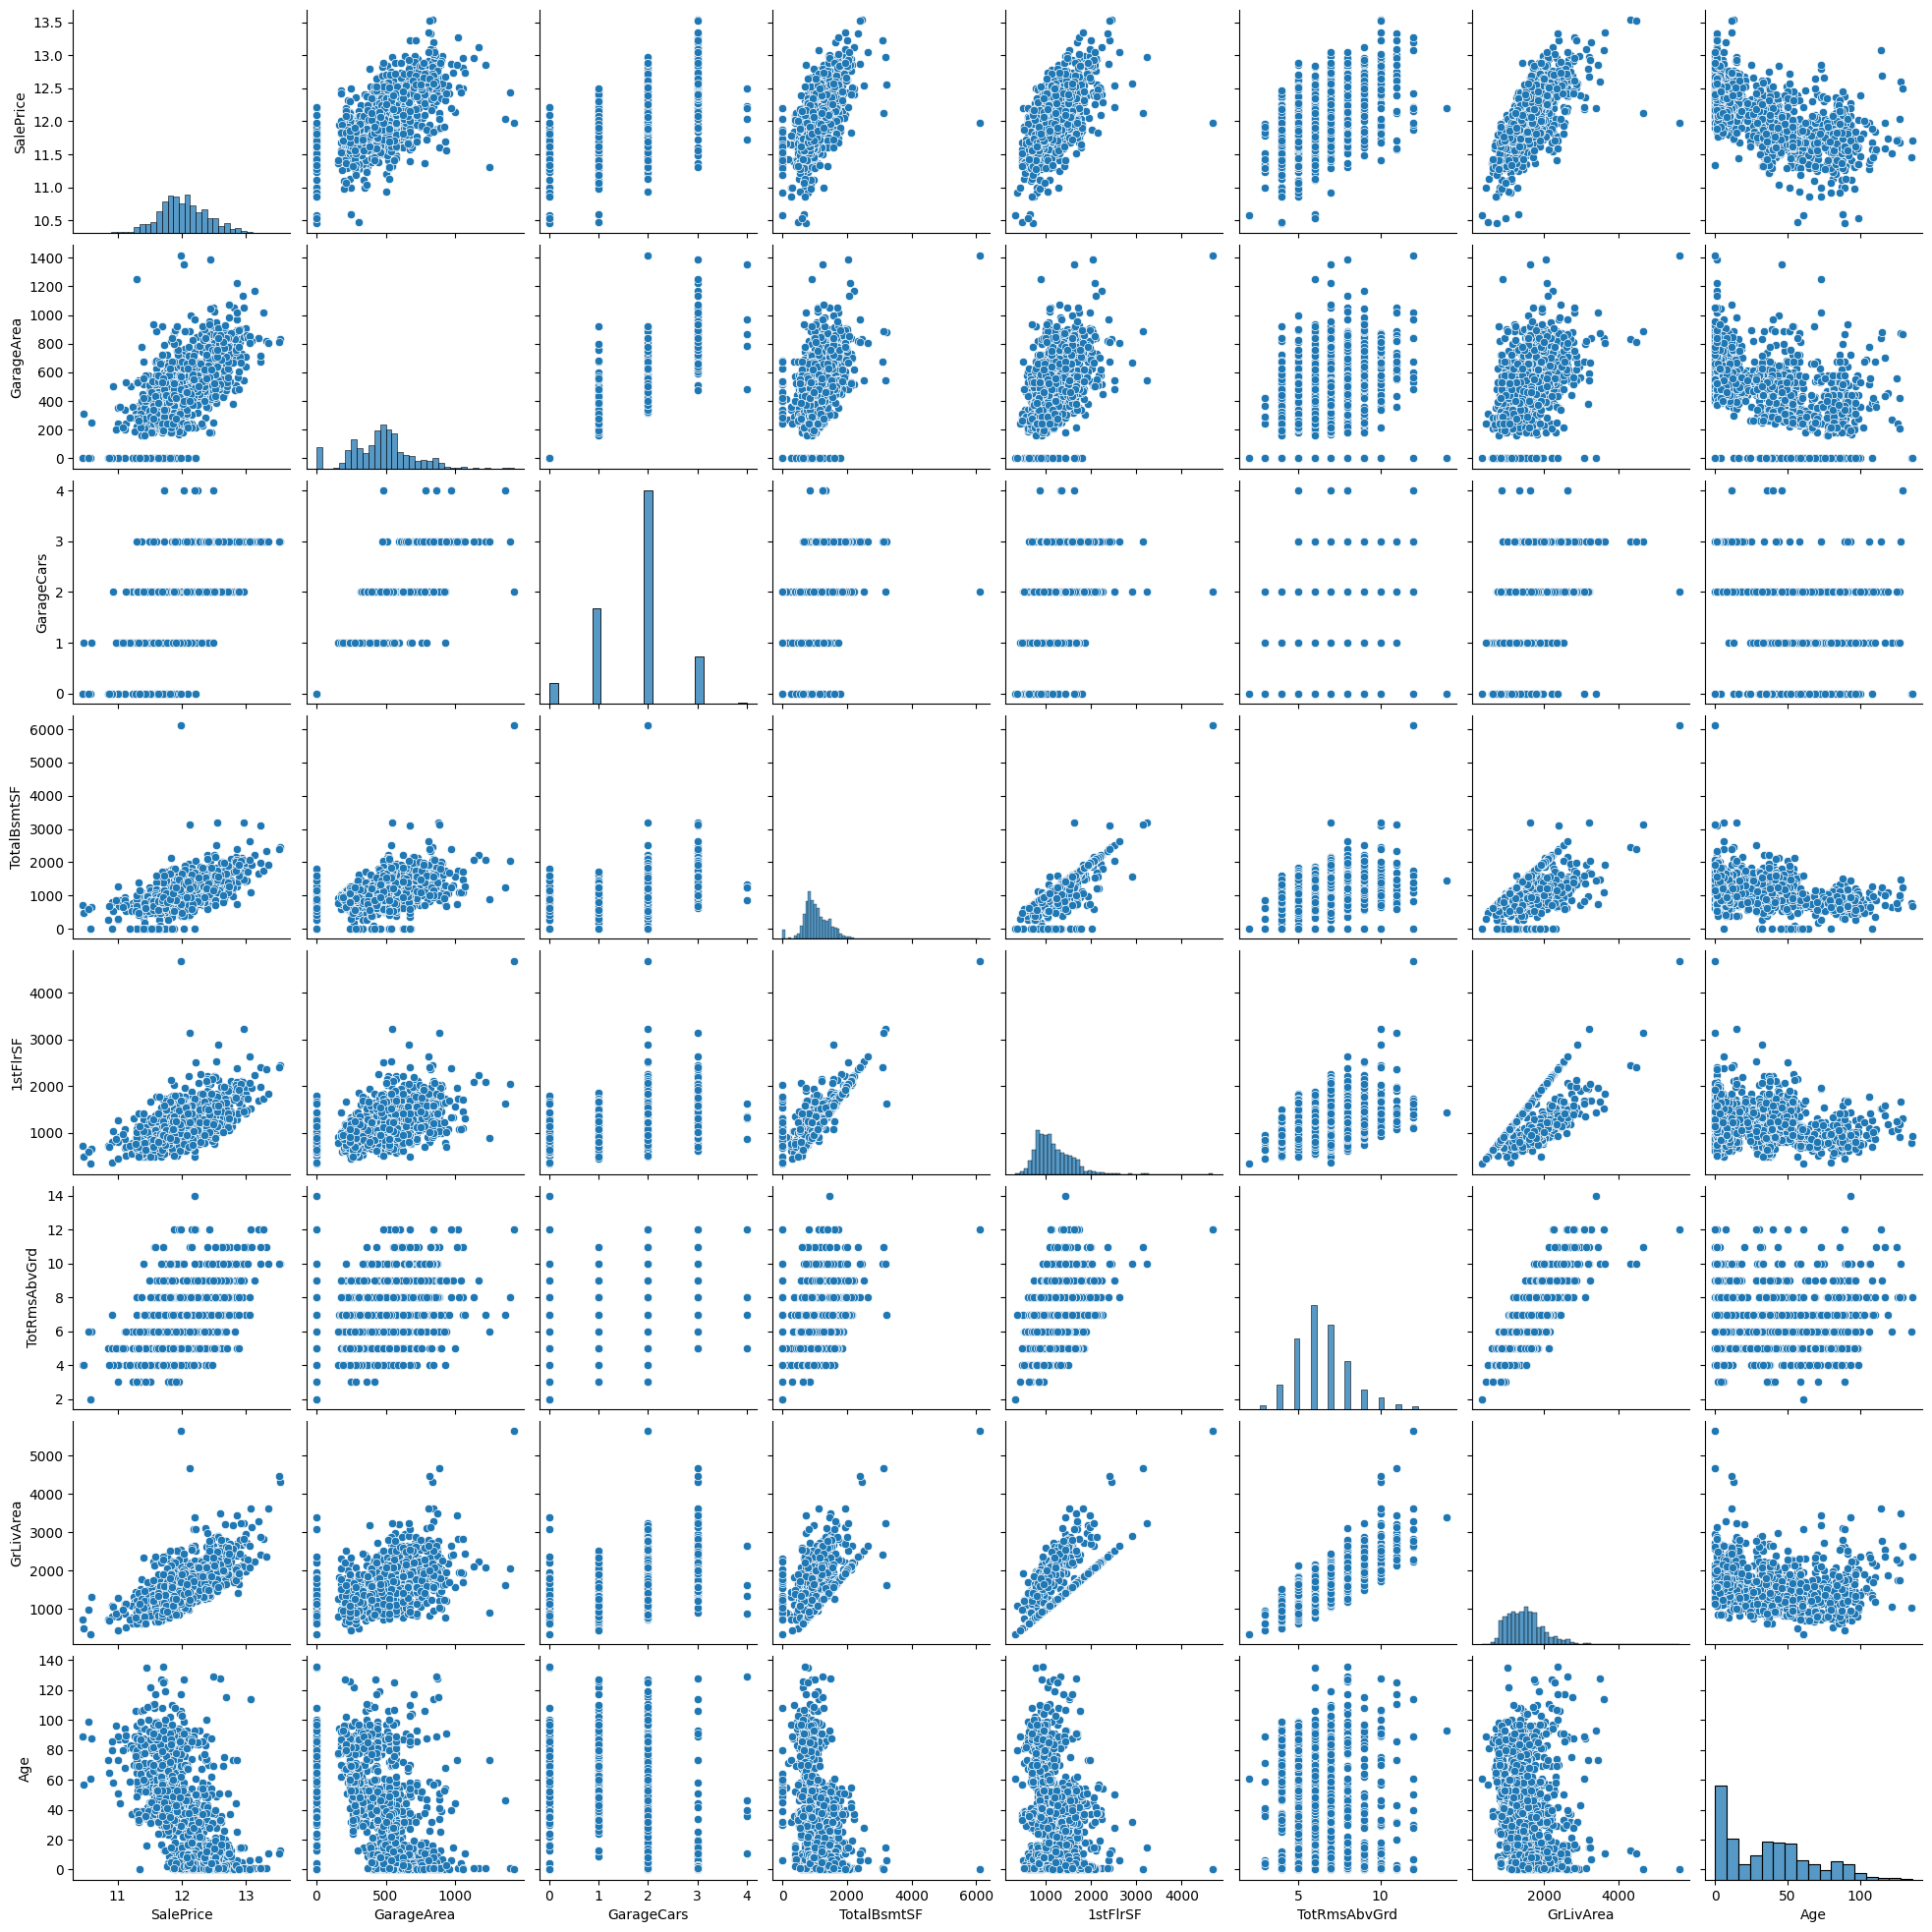

In [ ]:
col=['SalePrice','GarageArea','GarageCars','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','GrLivArea','Age']
plt.figure(figsize=(20,20))
sns.pairplot(housing[col])
plt.show()

### Dumy Encoding

In [ ]:
housing_num = housing.select_dtypes(include=['int64', 'float64'])
housing_cat = housing.select_dtypes(include='object')

In [ ]:
housing_cat_dum=pd.get_dummies(housing_cat,drop_first=True,dtype=int)

In [ ]:
housing_cat_dum.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0              0              0              0              0              1              0   
1              0              0              0              0              0              0   
2              0              0              0              0              1              0   
3              0              0              0              0              0              1   
4              0              0              0              0              1              0   

   MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0              0              0              0              0               0               0   
1              0              0              0              0               0               0   
2              0              0              0              0               0               0   
3              0              0              0              0               0               0   
4              0              0              0              0               0               0   

   MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0               0            0            0            1            0   
1               0               0            0            0            1            0   
2               0               0            0            0            1            0   
3               0               0            0            0            1            0   
4               0               0            0            0            1            0   

   Street_Pave  Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0            1           1           0             0             0             1                0   
1            1           1           0             0             0             1                0   
2            1           1           0             0             0             0                0   
3            1           1           0             0             0             0                0   
4            1           1           0             0             0             0                0   

   LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                0                1                 0                  0              0   
1                0                1                 0                  0              1   
2                0                1                 0                  0              0   
3                0                1                 0                  0              0   
4                0                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0              0                 1              0              0                     0   
1              0                 0              0              0                     0   
2              0                 1              0              0                     0   
3              0                 0              0              0                     0   
4              0                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                    0                     0                     0                     1   
1                    0                     0                     0                     0   
2                    0                     0                     0                     1   
3                    0                     0                     0                     0   
4                    0                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilber

In [ ]:
house=pd.concat([housing_num,housing_cat_dum],axis=1)
house.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0         65.0     8450          2003       196.0         706           0        150          856   
1         80.0     9600          1976         0.0         978           0        284         1262   
2         68.0    11250          2002       162.0         486           0        434          920   
3         60.0     9550          1970         0.0         216           0        540          756   
4         84.0    14260          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0       856       854             0       1710             1             0         2         1   
1      1262         0             0       1262             0             1         2         0   
2       920       866             0       1786             1             0         2         1   
3       961       756             0       1717             1             0         1         0   
4      1145      1053             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0             3             1             8           0       2003.0           2         548   
1             3             1             6           1       1976.0           2         460   
2             3             1             6           1       2001.0           2         608   
3             3             1             7           1       1998.0           3         642   
4             4             1             9           1       2000.0           3         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0           0           61              0          0            0         0        0       2   
1         298            0              0          0            0         0        0       5   
2           0           42              0          0            0         0        0       9   
3           0           35            272          0            0         0        0       2   
4         192           84              0          0            0         0        0      12   

   SalePrice  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0  12.247694    5              0              0              0              0              1   
1  12.109011   31              0              0              0              0              0   
2  12.317167    7              0              0              0              0              1   
3  11.849398   91              0              0              0              0              0   
4  12.429216    8              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0              0              0               0   
1              0              0              0              0              0               0   
2              0              0              0              0              0               0   
3              1              0              0              0              0               0   
4              0              0              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0               0               0               0            0            0            1   
1               0               0               0            0            0            1   
2               0               0               0            0            0            1   
3               0               0               0            0            0            1   
4               0               0      

Splitting the data

In [ ]:
X=house.drop(['SalePrice'],axis=1).copy()
Y=house['SalePrice'].copy()

In [ ]:
X.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0         65.0     8450          2003       196.0         706           0        150          856   
1         80.0     9600          1976         0.0         978           0        284         1262   
2         68.0    11250          2002       162.0         486           0        434          920   
3         60.0     9550          1970         0.0         216           0        540          756   
4         84.0    14260          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0       856       854             0       1710             1             0         2         1   
1      1262         0             0       1262             0             1         2         0   
2       920       866             0       1786             1             0         2         1   
3       961       756             0       1717             1             0         1         0   
4      1145      1053             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0             3             1             8           0       2003.0           2         548   
1             3             1             6           1       1976.0           2         460   
2             3             1             6           1       2001.0           2         608   
3             3             1             7           1       1998.0           3         642   
4             4             1             9           1       2000.0           3         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  Age  \
0           0           61              0          0            0         0        0       2    5   
1         298            0              0          0            0         0        0       5   31   
2           0           42              0          0            0         0        0       9    7   
3           0           35            272          0            0         0        0       2   91   
4         192           84              0          0            0         0        0      12    8   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0              0              0              0              0              1              0   
1              0              0              0              0              0              0   
2              0              0              0              0              1              0   
3              0              0              0              0              0              1   
4              0              0              0              0              1              0   

   MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0              0              0              0              0               0               0   
1              0              0              0              0               0               0   
2              0              0              0              0               0               0   
3              0              0              0              0               0               0   
4              0              0              0              0               0               0   

   MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0               0            0            0            1            0   
1               0               0            0            0            1            0   
2               0               0            0            0            1            0   
3               0               0            0            0            1            0   
4               0       

In [ ]:
Y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/4, random_state = 36)


Scaling the data

In [ ]:
num_col=list(X_train.select_dtypes(include=['int64','float64']).columns)

In [ ]:
scaler=StandardScaler()
X_train[num_col]=scaler.fit_transform(X_train[num_col])
X_test[num_col]=scaler.fit_transform(X_test[num_col])

In [ ]:
X_train.head()

LotFrontage   LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
547    -0.702918 -0.377055     -0.703807   -0.557243    0.387722   -0.292275  -0.954356   
207     0.015957  0.278516     -1.186349   -0.557243   -0.051447    1.619274  -0.431907   
734     0.015957 -0.160488     -0.800315   -0.557243   -0.971506   -0.292275   0.892708   
104     0.015957 -0.312859     -1.668891    2.642772   -0.479637   -0.292275   0.587561   
946     0.013720 -0.262277     -1.234603    0.125427    0.670986    1.544312  -1.063007   

     TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
547    -0.642753 -1.011445 -0.794055       -0.1025  -1.399809      1.119161     -0.234869   
207     0.111156 -0.155971 -0.794055       -0.1025  -0.774742      1.119161     -0.234869   
734    -0.234007 -0.547634 -0.794055       -0.1025  -1.060917     -0.819892     -0.234869   
104    -0.025093  0.168697  0.561672       -0.1025   0.577060     -0.819892     -0.234869   
946     0.211071 -0.042595 -0.794055       -0.1025  -0.691902      1.119161     -0.234869   

     FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
547 -1.033662 -0.776257     -1.073489     -0.212456     -0.924504   -0.950206     0.359092   
207 -1.033662 -0.776257      0.185045     -0.212456     -0.301530    0.602743    -0.775437   
734 -1.033662 -0.776257      0.185045     -0.212456     -0.301530   -0.950206    -0.439280   
104 -1.033662  1.205099      1.443579     -0.212456      0.321443    2.155692    -1.153613   
946 -1.033662 -0.776257      0.185045     -0.212456     -0.301530    0.602743    -0.817457   

     GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
547    0.322298    0.740581    0.111293    -0.693656      -0.371275   -0.11462     -0.27848   
207   -1.050916   -0.772459    2.137014    -0.693656      -0.371275   -0.11462     -0.27848   
734   -1.050916   -0.830653    0.458329    -0.693656      -0.371275   -0.11462     -0.27848   
104   -1.050916   -1.121622   -0.728049    -0.693656      -0.371275   -0.11462      2.91620   
946   -1.050916    1.574693   -0.033978    -0.693656      -0.371275   -0.11462     -0.27848   

     PoolArea   MiscVal    MoSold       Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
547 -0.066934 -0.095243 -0.857145  0.030975       -0.22553      -0.042776      -0.091035   
207 -0.066934 -0.095243 -0.857145  0.405187       -0.22553      -0.042776      -0.091035   
734 -0.066934 -0.095243 -0.486167  0.099013       -0.22553      -0.042776      -0.091035   
104 -0.066934 -0.095243 -0.115189  1.357729       -0.22553      -0.042776      -0.091035   
946 -0.066934 -0.095243 -1.228123  0.371168       -0.22553      -0.042776      -0.091035   

     MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
547      -0.339222      -0.504277      -0.194717      -0.091035      -0.204609       9.123090   
207      -0.339222      -0.504277      -0.194717      -0.091035      -0.204609      -0.109612   
734      -0.339222      -0.504277      -0.194717      -0.091035      -0.204609      -0.109612   
104       2.947926      -0.504277      -0.194717      -0.091035      -0.204609      -0.109612   
946      -0.339222      -0.504277      -0.194717      -0.091035       4.887368      -0.109612   

     MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  \
547      -0.199715       -0.263317       -0.221022       -0.067729       -0.132883    -0.223285   
207      -0.199715       -0.263317       -0.221022       -0.067729       -0.132883    -0.223285   
734      -0.199715       -0.263317       -0.221022       -0.067729       -0.132883    -0.223285   
104      -0.199715       -0.263317       -0.221022       -0.067729       -0.132883    -0.223285   
946      -0.199715       -0.263317       -0.221022       -0.067729       -0.132883    -0.223285   

     MSZoning_RH  MSZoning_RL  M

Building a function to calculate the evaluation metrice

In [ ]:
def eval_matrics(y_train,y_train_pred,y_test,y_pred):
  #r2 values for train and test set
  print("r2 score (train) = ", '%.2f' %r2_score(y_train,y_train_pred))
  print("r2 score (test) = ", '%.2f' %r2_score(y_test,y_pred))
  mse_test=mean_squared_error(y_test,y_pred)
  mse_train=mean_squared_error(y_train,y_train_pred)
  rmse_train=mse_train**0.5
  rmse_test=mse_test**0.5
  #root mean square value
  print("RMSE (Train) =", '%.2f' % rmse_train)
  print("RMSE (Test) =", '%.2f' % rmse_test)

###***Building ML Model***

Ridge regression

In [ ]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

ridgeCV = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error',
                       cv = 5, return_train_score=True,verbose = 1, n_jobs=-1)
ridgeCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
ridgeCV.best_params_

{'alpha': 500}

In [ ]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.03830428, 0.03326454, 0.03630004, 0.03531675, 0.03352771,
        0.02327824, 0.02440085, 0.02120466, 0.02574205, 0.02337518,
        0.02896533, 0.03274407, 0.05179801, 0.03413253, 0.03591313,
        0.03604107, 0.04898534, 0.04512711, 0.03846827, 0.03494024,
        0.04669752, 0.04946756, 0.03503747, 0.0376298 , 0.03678746,
        0.02537627, 0.03894453, 0.05477719]),
 'std_fit_time': array([0.0099549 , 0.00609065, 0.01784395, 0.00753554, 0.00503435,
        0.00489464, 0.0082396 , 0.00413564, 0.00531378, 0.00467217,
        0.00830716, 0.01330615, 0.03097922, 0.00719834, 0.01580456,
        0.0086084 , 0.01809642, 0.00629925, 0.01020112, 0.01282381,
        0.00829157, 0.01061145, 0.01518798, 0.01300145, 0.0179647 ,
        0.00822653, 0.01526228, 0.00231174]),
 'mean_score_time': array([0.00719666, 0.00672727, 0.01025958, 0.00668488, 0.00690579,
        0.00676918, 0.00659504, 0.00673947, 0.00895696, 0.01098247,
        0.0116643 , 0.01046672, 0.009940

In [ ]:
ridge = Ridge(alpha=500)

In [ ]:
ridge.fit(X_train, y_train)

Ridge(alpha=500)

In [ ]:
y_train_pred=ridge.predict(X_train)
y_pred=ridge.predict(X_test)

In [ ]:
eval_matrics(y_train,y_train_pred,y_test,y_pred)

r2 score (train) =  0.92
r2 score (test) =  0.87
RMSE (Train) = 0.11
RMSE (Test) = 0.16


In [ ]:
ridgeCV_res=pd.DataFrame(ridgeCV.cv_results_)

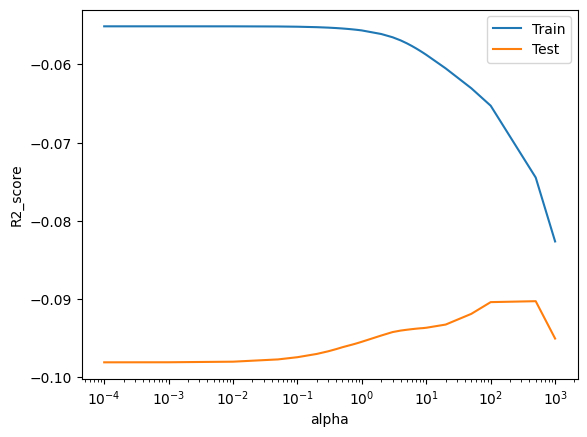

In [ ]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_res['param_alpha'], ridgeCV_res['mean_train_score'], label='Train')
plt.plot(ridgeCV_res['param_alpha'], ridgeCV_res['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

Lasso Regression


In [ ]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

lassoCV = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error',
                       cv = 5, return_train_score=True,verbose = 1, n_jobs=-1)
lassoCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
lassoCV.best_params_

{'alpha': 0.001}

In [ ]:
lasso = Lasso(alpha=0.001)

In [ ]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [ ]:
y_train_pred1=lasso.predict(X_train)
y_pred1=lasso.predict(X_test)

In [ ]:
eval_matrics(y_train,y_train_pred1,y_test,y_pred1)

r2 score (train) =  0.94
r2 score (test) =  0.81
RMSE (Train) = 0.09
RMSE (Test) = 0.19


In [ ]:
lassoCV_res=pd.DataFrame(lassoCV.cv_results_)

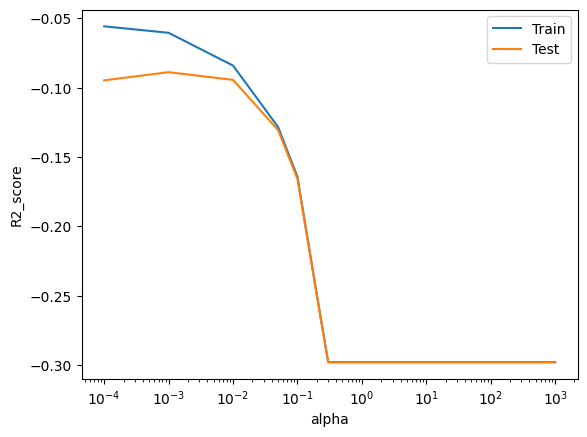

In [ ]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_res['param_alpha'], lassoCV_res['mean_train_score'], label='Train')
plt.plot(lassoCV_res['param_alpha'], lassoCV_res['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [ ]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

betas

Ridge     Lasso
LotFrontage           -0.000187 -0.000000
LotArea                0.011907  0.020110
YearRemodAdd           0.013555  0.008725
MasVnrArea             0.009979  0.004742
BsmtFinSF1             0.009583  0.011183
BsmtFinSF2             0.003610  0.004469
BsmtUnfSF              0.004811 -0.000000
TotalBsmtSF            0.015948  0.009223
1stFlrSF               0.024786  0.012835
2ndFlrSF               0.016024  0.000000
LowQualFinSF           0.004452  0.001643
GrLivArea              0.031630  0.105688
BsmtFullBath           0.013447  0.019271
BsmtHalfBath          -0.000456  0.000056
FullBath               0.019826  0.015404
HalfBath               0.013360  0.009328
BedroomAbvGr           0.007915 -0.000000
KitchenAbvGr          -0.006433 -0.013312
TotRmsAbvGrd           0.023291  0.016859
Fireplaces             0.015462  0.018397
GarageYrBlt            0.004067 -0.000000
GarageCars             0.022572  0.028305
GarageArea             0.016828  0.015050
WoodDeckSF             0.010429  0.007466
OpenPorchSF            0.003331 -0.000000
EnclosedPorch          0.003132  0.005266
3SsnPorch              0.003703  0.002632
ScreenPorch            0.011117  0.013552
PoolArea               0.006994  0.016452
MiscVal                0.001862  0.000286
MoSold                 0.000418 -0.002116
Age                   -0.012305 -0.046792
MSSubClass_30         -0.013381 -0.011422
MSSubClass_40          0.002510  0.003629
MSSubClass_45          0.000350  0.000000
MSSubClass_50         -0.000066  0.000000
MSSubClass_60          0.003149 -0.004666
MSSubClass_70          0.008231  0.005684
MSSubClass_75          0.004233  0.001865
MSSubClass_80          0.000517  0.000000
MSSubClass_85         -0.000493 -0.000000
MSSubClass_90         -0.000558 -0.000000
MSSubClass_120        -0.004540 -0.000000
MSSubClass_160        -0.010700 -0.012828
MSSubClass_180        -0.002672 -0.001471
MSSubClass_190        -0.002163 -0.000000
MSZoning_FV            0.005499  0.018559
MSZoning_RH           -0.000489  0.004941
MSZoning_RL            0.011214  0.044729
MSZoning_RM           -0.004740  0.028038
Street_Pave            0.007007  0.011378
Alley_None             0.001016  0.000000
Alley_Pave             0.005415  0.005316
LotShape_IR2           0.005727  0.004506
LotShape_IR3          -0.009487 -0.002218
LotShape_Reg          -0.002144  0.000158
LandContour_HLS        0.003241  0.003035
LandContour_Low        0.002608  0.003031
LandContour_Lvl        0.008945  0.016831
Utilities_NoSeWa      -0.004238 -0.004452
LotConfig_CulDSac      0.007812  0.007782
LotConfig_FR2         -0.003675 -0.003353
LotConfig_FR3         -0.001676 -0.003229
LotConfig_Inside      -0.003172 -0.002979
LandSlope_Mod          0.003246  0.005246
LandSlope_Sev         -0.000205 -0.003441
Neighborhood_Blueste  -0.001320 -0.000085
Neighborhood_BrDale   -0.005453 -0.002971
Neighborhood_BrkSide  -0.000240  0.001199
Neighborhood_ClearCr   0.005041  0.007182
Neighborhood_CollgCr  -0.000494  0.002878
Neighborhood_Crawfor   0.018069  0.027426
Neighborhood_Edwards  -0.012314 -0.010939
Neighborhood_Gilbert  -0.004310  0.000000
Neighborhood_IDOTRR   -0.010120 -0.004923
Neighborhood_MeadowV  -0.012374 -0.010561
Neighborhood_Mitchel  -0.004706 -0.006404
Neighborhood_NAmes    -0.004663 -0.000445
Neighborhood_NPkVill  -0.001375  0.000000
Neighborhood_NWAmes   -0.001464 -0.001025
Neighborhood_NoRidge   0.013124  0.011120
Neighborhood_NridgHt   0.019783  0.026100
Neighborhood_OldTown  -0.007371 -0.009630
Neighborhood_SWISU    -0.002316  0.000000
Neighborhood_Sawyer   -0.004822 -0.001554
Neighborhood_SawyerW   0.001369  0.004352
Neighborhood_Somerst   0.010354  0.023478
Neighborhood_StoneBr   0.012039  0.016104
Neighborhood_Timber    0.002110  0.002519
Neighborhood_Veenker   0.005649  0.005767
Condition1_Feedr      -0.005946 -0.000000
Condition1_Norm        0.009794  0.020394
Condition1_PosA        0.001898  0.000000
Condition1_PosN        0.002364  0.005984
Condition1_RRAe       -0.004914 -0.0

In [ ]:
lasso_rem_col=list(betas[betas['Lasso']==0].index)
lasso_rem_col

['LotFrontage',
 'BsmtUnfSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'GarageYrBlt',
 'OpenPorchSF',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_190',
 'Alley_None',
 'Neighborhood_Gilbert',
 'Neighborhood_NPkVill',
 'Neighborhood_SWISU',
 'Condition1_Feedr',
 'Condition1_PosA',
 'Condition1_RRNe',
 'Condition2_PosA',
 'Condition2_RRAe',
 'BldgType_Duplex',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'OverallQual_6',
 'OverallCond_6',
 'RoofStyle_Gable',
 'RoofStyle_Shed',
 'RoofMatl_Membran',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CemntBd',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_VinylSd',
 'Exterior2nd_CBlock',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Other',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterCond_TA',
 'Foundation_C

In [ ]:
lasso_sel_col=list(betas[betas['Lasso']!=0].index)
lasso_sel_col

['LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 

In [ ]:
print("Selected features by Lasso : ",len(lasso_sel_col))
print("Removed features by Lasso : ",len(lasso_rem_col))

Selected features by Lasso :  198
Removed features by Lasso :  89


In [ ]:
#Top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               0.031630
1stFlrSF                0.024786
OverallQual_9           0.023349
TotRmsAbvGrd            0.023291
GarageCars              0.022572
FullBath                0.019826
Neighborhood_NridgHt    0.019783
OverallQual_8           0.019641
Neighborhood_Crawfor    0.018069
GarageArea              0.016828
Name: Ridge, dtype: float64

In [ ]:
#Top 10 coefficients of Lasso regression in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

RoofMatl_CompShg    0.181224
RoofMatl_Tar&Grv    0.124549
RoofMatl_WdShngl    0.107889
GrLivArea           0.105688
RoofMatl_WdShake    0.050459
MSZoning_RL         0.044729
RoofMatl_Metal      0.042876
RoofMatl_Roll       0.039163
OverallQual_9       0.030169
OverallQual_8       0.030010
Name: Lasso, dtype: float64

In [ ]:
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.032135
1stFlrSF                1.025096
OverallQual_9           1.023624
TotRmsAbvGrd            1.023564
GarageCars              1.022829
FullBath                1.020023
Neighborhood_NridgHt    1.019980
OverallQual_8           1.019835
Neighborhood_Crawfor    1.018233
GarageArea              1.016970
Name: Ridge, dtype: float64

In [ ]:
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

RoofMatl_CompShg    1.198684
RoofMatl_Tar&Grv    1.132638
RoofMatl_WdShngl    1.113925
GrLivArea           1.111475
RoofMatl_WdShake    1.051753
MSZoning_RL         1.045744
RoofMatl_Metal      1.043808
RoofMatl_Roll       1.039940
OverallQual_9       1.030629
OverallQual_8       1.030464
Name: Lasso, dtype: float64

#Top 10 coefficients of Ridge regression in descending order
#GrLivArea               1.032135
#1stFlrSF                1.025096
#OverallQual_9           1.023624
#TotRmsAbvGrd            1.023564
#GarageCars              1.022829
#FullBath                1.020023
#Neighborhood_NridgHt    1.019980
#OverallQual_8           1.019835
#Neighborhood_Crawfor    1.018233
#GarageArea              1.016970

#Top 10 coefficients of Lasso regression in descending order
#RoofMatl_CompShg    1.198684
#RoofMatl_Tar&Grv    1.132638
#RoofMatl_WdShngl    1.113925
#GrLivArea           1.111475
#RoofMatl_WdShake    1.051753
#MSZoning_RL         1.045744
#RoofMatl_Metal      1.043808
#RoofMatl_Roll       1.039940
#OverallQual_9       1.030629
#OverallQual_8       1.030464

#Optimal value of lambda for Ridge Regression = 500
#Optimal value of lambda for Lasso = 0.001